https://typeset.io/

# Melhorias para Próximas Versões

1 - trocar "tempo" por "t"

2 - trocar "nome_jogo" por "jogo"

3 - limpar todos os códigos comentados "nos meios" dos códigos utilizados, deixar o código mais "clean". Deixar apenas as células que tenham ideias para serem desenvolvidas e que estejam comentadas.

4 - Salvar no GitHub

5 - trocar "total_passos" por "n_passos"

6 - trocar "total_episodios" por "n_eps"

7 - tricar "maximo_passos" por "max_passos"

8 - A V3 não tem condicional no incremento do ultimo índice, ou seja, ela vai incrmenetar todos os últimos índices, mas devia fazer isso só quando chegasse em na pontuação máxima.

9 -  Achar um jogo com pontuação máxima definida.

# Informações sobre os Jogos

# Defesa e Versão Final

# Base para Todas Versões

## Instalações

In [ ]:
!pip install tensordict
!pip install torchrl

In [ ]:
# !pip install tensordict-nightly
# !pip install torchrl-nightly

In [ ]:
# !pip install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu118

In [ ]:
# !pip install tensordict # Esse pacote é uma biblioteca que fornece um dicionário de tensores
# tensordict-0.4.0-cp310-cp310-manylinux1_x86_64.whl.metadata

In [ ]:
# !pip install --upgrade torchrl
!pip install torchrl # torchrl é um complemento focado em fornecer ferramentas e utilitários específicos para Aprendizado por Reforço.

In [ ]:
!pip install --upgrade torch torchvision
# torch refere-se ao PyTorch, biblioteca de aprendizado de máquina utilizada para aplicações de deep learning.
# torchvision é uma biblioteca que complementa o PyTorch com ferramentas específicas para visão computacional.

In [ ]:
!pip install av # av é uma biblioteca de Python que proporciona uma interface simplificada para a manipulação de áudio e vídeo.

In [ ]:
!pip install requests pandas

In [ ]:
# !pip install gymnasium
# !pip install gymnasium==0.26.3

In [ ]:
!pip install gym

In [ ]:
!apt-get install swig

In [ ]:
# !pip install gymnasium[box2d]
!pip install gym[box2d]

In [ ]:
# !pip uninstall gymnasium -y

## Importações

In [ ]:
import torch #  permitindo operações avançadas de aprendizado de máquina e manipulação de tensores.
import time #  oferece funcionalidades relacionadas ao tempo, como obter a hora atual, pausar a execução do programa, e medir intervalos de tempo.

In [ ]:
import torchvision  # fornece:
# Modelos de redes neurais pré-treinados.
# Conjuntos de dados populares para visão computacional.
# Ferramentas para transformar e manipular imagens.
# Utilitários adicionais para facilitar o trabalho com dados de imagem.

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt # from matplotlib import pyplot as plt

In [ ]:
import tempfile
import tqdm

In [ ]:
from tensordict import TensorDict, tensorclass

In [ ]:
from torchrl.envs import GymEnv
from torchrl.envs import StepCounter
from torchrl.envs import TransformedEnv
# GymEnv: Classe que integra ambientes do OpenAI Gym com a biblioteca torchrl, permitindo o uso de ambientes padrão de Reinforcement Learning.
# StepCounter: Um wrapper para contar o número de passos realizados em um ambiente.
# TransformedEnv: Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas.
from torchrl.modules import EGreedyModule, MLP, QValueModule
# EGreedyModule: Implementa uma política epsilon-greedy, que escolhe ações aleatoriamente com probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# MLP: Multi-Layer Perceptron, uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# QValueModule: Um módulo específico para calcular valores Q, usados em algoritmos de Q-learning.
from torchrl.collectors import SyncDataCollector # Coletor de dados síncrono, usado para coletar experiências do ambiente de forma síncrona
from torchrl.data import LazyMemmapStorage, LazyTensorStorage, ListStorage, ReplayBuffer, PrioritizedReplayBuffer, TensorDictReplayBuffer
# LazyMemmapStorage: Armazena tensores de maneira eficiente em um arquivo de mapa de memória.
# LazyTensorStorage: Armazena tensores de maneira eficiente, com carregamento atrasado.
# ReplayBuffer: Buffer de replay, usado para armazenar e amostrar experiências anteriores, crucial para métodos de RL como DQN.
from torchrl.objectives import DQNLoss, SoftUpdate
# DQNLoss: Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
# SoftUpdate: Função para atualização suave dos parâmetros do modelo, frequentemente usada em algoritmos de RL para atualizar gradualmente uma rede alvo.
from torchrl._utils import logger as torchrl_logger # Utilitário de registro usado para registrar mensagens de depuração e informações durante a execução.
from torchrl.record import CSVLogger, VideoRecorder
# CSVLogger: Logger que registra dados em um arquivo CSV, útil para monitorar o treinamento e resultados.
# VideoRecorder: Grava vídeos das execuções dos ambientes, útil para visualizar o comportamento de agentes de RL.

from tensordict.nn import TensorDictModule as Mod, TensorDictSequential as Seq
# TensorDictModule (Mod): Um módulo que opera sobre TensorDicts, que são dicionários especializados em armazenar tensores.
# TensorDictSequential (Seq): Similar ao torch.nn.Sequential, mas opera sobre TensorDicts,
# permitindo a construção de modelos sequenciais que trabalham com múltiplos tensores de entrada e saída.

from torch.optim import Adam # Adam: Um otimizador amplamente utilizado, que combina as vantagens dos métodos AdaGrad e RMSProp,
# ajustando os passos de atualização com base em estimativas de momentos de primeira e segunda ordem dos gradientes.

from torchrl.data.replay_buffers.samplers import PrioritizedSampler, SamplerWithoutReplacement, RandomSampler

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # Monta o Google Drivsse

In [ ]:
import os

In [ ]:
from IPython.display import Audio, display

In [ ]:
from collections import deque

In [ ]:
import torchrl.data

In [ ]:
from torch.utils._pytree import tree_map

In [ ]:
import requests

In [ ]:
import io
from io import BytesIO

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
import copy

In [ ]:
# import gymnasium as gym
import gym

## Parâmetros Gerais

In [ ]:
#@title Hiperparâmetros
nome_jogo = "Acrobot-v1"     # Define o ambiente de RL: 'Acrobot-v1'| 'CartPole-v1' | 'MountainCar-v0' | 'LunarLander-v2' | 'Blackjack-v1'
num_celulas = [64, 64]        # Define a arquitetura da rede neural, com duas camadas ocultas de 64 neurônios cada.
passos_decaimento = 345       # Número de passos até o valor mínimo de epsilon
epsilon_ini = 1               # Valor inicial de epsilon
epsilon_fim = 0.001           # Valor mínimo de epsilon
passos_aleatorios_ini = 500   # Define o número inicial de passos aleatórios a serem realizados no ambiente antes de começar a usar a política treinada.
                              # VERIFICAR POIS A QUANTIDADE DE PASSOS DADOS NÃO BATE COM A QUANTIDADE DE EXPERIÊNCIAS ARMAZENADAS NO REPLAY BUFFER
exp_coletadas = 500           # Define o número de frames (ou passos de tempo) que serão coletados em cada lote (batch) de coleta de dados do ambiente.
                                  # VERIFICAR ESSE PARÂMETRO POIS ESTÁ DEFININDO O TAMANHO DO EPISÓDIO
passos_otimizacao = 10        # Define o número de passos de otimização que serão realizados após cada lote de coleta de dados.
tamanho_buffer = 100_000    # Define o tamanho do buffer de replay.
alfa = 0.6                    # Parâmetro de correção de viés de importância. Valores maiores de beta aumentam a correção.
beta = 1.0                    # O parâmetro de correção de viés de importância. Valores maiores de beta aumentam a correção.
funcao_perda = "l2"           # Pode ser “l1”, “l2” ou “smooth_l1”.
valor_delay = True            # O padrão é False para não criar uma rede alvo.
taxa_aprendizado = 0.001      # Define a taxa de aprendizado (learning rate) para o otimizador.
tau = 0.99                    # Define o fator de atualização suave da rede alvo para a política de exploração.
renderizado_pixel = True      # Indica que o ambiente será renderizado a partir de pixels, permitindo a gravação visual do ambiente.
somente_pixel = False         # Tanto as observações em forma de pixels quanto outras observações (como a posição e a velocidade do carrinho) serão retornadas pelo ambiente.
caminho = "./training_loop"   # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
formato_video = "mp4"         # Especifica o formato de vídeo para gravação.
episodios = 20000             # Define o número total de episódios a serem treinados.
quantidade_paradas = 5        # Número de paradas em 500 pontos
tamanho_amostra = 500         # Tamanho do MINIBATCH

In [ ]:
#@title Definir recompensa com basa no ambiente
if  nome_jogo         == "Acrobot-v1":
    recompensa_maxima = -100        # Define a recompensa máxima que o agente pode receber. (Nesse caso é a pior recompensa)
    passos_maximo     = 500         # Número máximo de passos para cada episódio.
    # max_steps         = 500
elif   nome_jogo      == "CartPole-v1":
    recompensa_maxima = 500         # Define a recompensa máxima que o agente pode receber.
    passos_maximo     = 500         # Número máximo de passos para cada episódio.
    # max_steps         = 500
elif nome_jogo        == "MountainCar-v0":
    recompensa_maxima = -200        # Define a recompensa máxima que o agente pode receber. (Nesse caso é a pior recompensa)
    passos_maximo     = 200         # Número máximo de passos para cada episódio. Truncamento: A duração do episódio é 200.
elif nome_jogo        == "LunarLander-v2":
    recompensa_maxima = 460       # Define a recompensa máxima que o agente pode receber. 260 a 460
    passos_maximo     = 500         # Número máximo de passos para cada episódio.
elif nome_jogo        == "Blackjack-v1":
    recompensa_maxima = 10000       # Define a recompensa máxima que o agente pode receber.
    passos_maximo     = 500         # Número máximo de passos para cada episódio.
else:
    recompensa_maxima = 500         # Define a recompensa máxima que o agente pode receber.
    passos_maximo     = 500         # Número máximo de passos para cada episódio.

In [ ]:
#@title Criando nome da pasta com base nos hiperparâmetros
nome_pasta_1 = "_" + nome_jogo + "_RN-" + str(num_celulas[0])+"-"+str(num_celulas[1])+"_EG-"+str(passos_decaimento)+"-"+str(epsilon_ini)+"-"+str(epsilon_fim)
nome_pasta_2 = '_CD-' + str(passos_aleatorios_ini) + '-' + str(exp_coletadas) + '-' + str(passos_otimizacao)
nome_pasta_3 = '_RB-' + str(tamanho_buffer/1000) + 'k-' + str(alfa) + '-' + str(beta)
nome_pasta_4 = '_O-' + str(funcao_perda) + '-' + str(taxa_aprendizado) + '_AR-' + str(tau)
nome_pasta_5 = '_T-' + str(episodios/1000) + 'k-' + str(quantidade_paradas) + '-' + str(tamanho_amostra)
nome_pasta = nome_pasta_1 + nome_pasta_2 + nome_pasta_3 + nome_pasta_4 + nome_pasta_5
print(nome_pasta)

# Funções Principais

## Construindo o ambiente

Estaremos usando um ambiente de academia com uma StepCounter transformação. Se precisar de uma atualização, verifique se esses recursos são apresentados no tutorial do ambiente .

In [ ]:
def criar_ambiente(nome_jogo, semente = 0):
    torch.manual_seed(semente)                              # define a semente manual para a geração de números aleatórios no PyTorch, garantindo a reprodutibilidade dos resultados.
    env = TransformedEnv(GymEnv(nome_jogo), StepCounter())  # cria o ambiente "CartPole-v1" do OpenAI Gym, com um contador de passos adicionado
    env.set_seed(semente)                                   # define a semente para o ambiente env, garantindo a consistência do comportamento do ambiente em diferentes execuções.
    return env

## Projetando uma política

O próximo passo é construir nossa política. Faremos uma versão regular e determinística do ator para ser usada no módulo de perda e durante a avaliação . A seguir, iremos aumentá-lo com um módulo de exploração para inferência .

### Rede Neural

In [ ]:
def criar_rede_neural(ambiente, num_celulas):
    # Cria uma MLP que mapeia observações do ambiente para valores de ação, com duas camadas ocultas de 64 neurônios cada.
    value_mlp = MLP(out_features = ambiente.action_spec.shape[-1], num_cells = num_celulas)

    # Cria um módulo que pega as observações do ambiente (observation) e produz valores de ação (action_value) usando a MLP definida anteriormente.
    value_net = Mod(value_mlp, in_keys = ["observation"], out_keys = ["action_value"])
    return value_net

### Política e Política de Exploração

In [ ]:
def criar_politica(ambiente, rede_valor, passos_decaimento, epsilon_ini, epsilon_fim):
    # Cria política que primeiro passa a observação através da value_net para obter os valores de ação
    # e, em seguida, usa o QValueModule para calcular os valores Q para as ações.
    policy = Seq(rede_valor, QValueModule(spec = ambiente.action_spec))

    # Cria um módulo de exploração que implementa uma estratégia epsilon-greedy com um valor inicial de epsilon de 0.5 e que diminui ao longo de 100.000 passos.
    exploration_module = EGreedyModule(ambiente.action_spec, annealing_num_steps = passos_decaimento, eps_init = epsilon_ini, eps_end = epsilon_fim)

    # Combina a política com o módulo de exploração em uma sequência, resultando em uma política que primeiro calcula os valores de ação
    # e, em seguida, aplica a estratégia epsilon-greedy para selecionar as ações.
    policy_explore = Seq(policy, exploration_module)  # Seq: Refere-se ao TensorDictSequential.

    return policy, exploration_module, policy_explore

Passando de e- decay = 0,98 para propocional em passos:

\begin{align}
 ϵ_{\mbox{inicial}} * ϵ_{\mbox{decay}}^{n_p} = ϵ_{\mbox{mínimo}}
\end{align}

\begin{align}
 n_p = (\frac{\log ϵ_{\mbox{mínimo}} - \log ϵ_{\mbox{inicial}} }{\log ϵ_{\mbox{decay}}})
\end{align}

\begin{align}
 n_p ≈ 345
\end{align}



## Coletor de Dados

In [ ]:
def criar_coletor(ambiente, politica, exp_coletadas, passos_aleatorios_ini, exp_totais = -1):
    # Um coletor de dados síncrono que coleta experiências do ambiente usando a política fornecida.
    collector = SyncDataCollector(
    ambiente,                                     # O ambiente de RL, criado anteriormente com TransformedEnv.
    politica,                                     # A política usada para coletar experiências do ambiente.
    frames_per_batch = exp_coletadas,             # Especifica que 200 frames serão coletados em cada lote.
    total_frames = exp_totais,                    # Especifica que o coletor deve continuar indefinidamente (ou até que seja explicitamente parado).
    init_random_frames = passos_aleatorios_ini,   # init_random_frames=init_rand_steps: 500 passos aleatórios realizados inicialmente p/ preencher o rb.
    )
    return collector

## Buffer de Replay

In [ ]:
def criar_Buffer_Replay(tamanho_buffer, tipo_armazenamento = LazyTensorStorage):
    rb = ReplayBuffer(storage = tipo_armazenamento(tamanho_buffer)) # Buffer de replay usado p/ armazenar experiências anteriores p/ amostragem durante o treinamento.
    return rb

In [ ]:
def criar_Buffer_Replay_Amostra_PER(tamanho_buffer, alfa, b, tipo_armazenamento = LazyTensorStorage):
    rb = ReplayBuffer(
    storage = tipo_armazenamento(tamanho_buffer),
    sampler = PrioritizedSampler(
        max_capacity = tamanho_buffer,            # A capacidade máxima do amostrador, que deve ser consistente com o tamanho do buffer de replay.
        alpha = alfa,                             # Controla quão fortemente a prioridade afeta a amostragem. Valores maiores de @: amostragem dependa mais das prioridades.
        beta = b)                                 # O parâmetro de correção de viés de importância. Valores maiores de beta aumentam a correção.
    )
    return rb

In [ ]:
def criar_Buffer_Replay_PER(tamanho_buffer, alfa, b, tipo_armazenamento = LazyTensorStorage):
    rb = PrioritizedReplayBuffer(alpha = alfa, beta = b, storage = tipo_armazenamento(tamanho_buffer))
    return rb

## Módulo de Perda

In [ ]:
def criar_perda(politica, ambiente, funcao_perda, reducao, valor_delay = True):
    #  Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
    loss = DQNLoss(value_network = politica, action_space = ambiente.action_spec, loss_function = funcao_perda, delay_value = valor_delay, reduction = reducao)
    return loss

## Otimizador

In [ ]:
def criar_otimizador(perca, taxa_aprendizado):
    # Um otimizador amplamente utilizado que combina as vantagens dos métodos AdaGrad e RMSProp.
    optim = Adam(perca.parameters(), lr = taxa_aprendizado)
    return optim

## Atualização da Rede Alvo

In [ ]:
def criar_atualizador_rede_alvo(perca, tau):
    # Implementa a atualização suave dos parâmetros da rede, uma técnica comum em algoritmos de RL para atualizar gradualmente uma rede alvo (target network) com os parâmetros da rede de valor (online network).
    updater = SoftUpdate(perca, eps = tau)
    return updater

## Registrador

In [ ]:
def criar_registrador(nome_experiencia, caminho, formato_video, etiqueta, nome_jogo, renderizado_pixel = True, somente_pixel = False):
    # CSVLogger: Um logger que registra dados em formato CSV, útil para monitorar o progresso do treinamento e analisar resultados.
    logger = CSVLogger(exp_name = nome_experiencia, log_dir = caminho, video_format = formato_video)

    # Um objeto que grava vídeos das execuções do ambiente durante o treinamento, útil para visualizar o comportamento do agente.
    video_recorder = VideoRecorder(logger, tag = etiqueta)

    # Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas, e também permite a adição de funcionalidades como gravação de vídeos.
    record_env = TransformedEnv(GymEnv(nome_jogo, from_pixels = renderizado_pixel, pixels_only = somente_pixel), video_recorder)
    return logger, video_recorder, record_env

# Funções Auxiliares

## Plotagem

In [ ]:
#@title Plotar Simples
def plotar(dados,
           xlabel = 'Episódio',
           ylabel = 'Recompensa',
           limit = True,
           xlimit = 1000,
           ylimit = 1000,
           title = 'Desempenho do Agente'):

    plt.plot(dados)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if limit:
      xlimit = [0,(xlimit*1.05)]
      ylimit = [0,(ylimit*1.05)]
      plt.xlim(xlimit)
      plt.ylim(ylimit)

    plt.title(title)
    plt.show()

In [ ]:
#@title Plotar Versões
def plotar_versoes(
                  #  dados,
                   coluna = 'Rewards_ep',
                   xlabel = 'Episódio',
                   ylabel = 'Recompensa',
                   tamanho_fig = (10, 6),
                   grade = False,
                   limit = True,
                   xlimit = 1000,
                   ylimit = 1000,
                   title = 'Desempenho do Agente'):
    plt.figure(figsize=tamanho_fig)

    plt.plot(resultado_medio_V1[coluna],          label = "V1 (DQN)",                                         linestyle = 'solid')
    plt.plot(resultado_medio_V2_rb[coluna] ,      label = "V2 (PER Original)",                                linestyle = 'dotted')
    # plt.plot(resultado_medio_V2_prb[coluna] ,     label = "V2 (PrioritazedReplayBuffer)",                     linestyle = 'dotted')
    plt.plot(resultado_medio_V2_1[coluna] ,       label = "V2.1 (PER Média Amostral)",                        linestyle = 'dotted')
    plt.plot(resultado_medio_V2_2[coluna] ,       label = "V2.2 (PER Soma Amostral)",                         linestyle = 'dotted')
    plt.plot(resultado_medio_V3_1v[coluna] ,      label = "V3 (PER Último Índice)",    linestyle = 'dashed')
    # plt.plot(resultado_medio_V3_2v[coluna] ,      label = "V3 (PER Últimos Índices - Priorização 2ª Vez)",    linestyle = 'dashed')
    # plt.plot(resultado_medio_V3_1[coluna] ,       label = "V3.1 (PER Melhores Índices - Max)",                linestyle = 'dashed')
    # plt.plot(resultado_medio_V3_2_sm1[coluna] ,   label = "V3.2 (PER Melhores Índices - Semi-Trajetória 1)",  linestyle = 'dashed')
    # plt.plot(resultado_medio_V3_2_sm2[coluna] ,   label = "V3.2 (PER Melhores Índices - Semi-Trajetória 2)",  linestyle = 'dashed')
    # plt.plot(resultado_medio_V3_3[coluna] ,       label = "V3.3 (PER Piores Índices - Max)",                  linestyle = 'dashed')
    # plt.plot(resultado_medio_V3_4_sm1[coluna] ,   label = "V3.4 (PER Piores Índices - Semi-Trajetória 1)",    linestyle = 'dashed')
    # plt.plot(resultado_medio_V3_4_sm2[coluna] ,   label = "V3.4 (PER Piores Índices - Semi-Trajetória 2)",    linestyle = 'dashed')
    plt.plot(resultado_medio_V4[coluna] ,         label = "V4 (PER Última Trajetória)",                       linestyle = 'dashdot')
    # plt.plot(resultado_medio_V4_1[coluna] ,       label = "V4.1 (PER Melhores Trajetórias)",                  linestyle = 'dashdot')
    # plt.plot(resultado_medio_V4_2[coluna] ,       label = "V4.2 (PER Fortalecimento da Base)",                linestyle = 'dashdot')
    # plt.plot(resultado_medio_V4_3[coluna] ,       label = "V4.3 (PER Piores Trajetórias)",                    linestyle = 'dashdot')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.legend()
    # plt.legend(bbox_to_anchor=(0.08, -0.18, 0.9, .102), loc = 'center', ncols = 3, mode = "expand", borderaxespad = 0.)
    plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.1), fancybox = True, shadow = True, ncol = 3)
    plt.grid(grade)

    # plt.plot(dados)

    if limit:
        xlimit = [0, (xlimit * 1.05)]
        ylimit = [0, (ylimit * 1.05)]
        plt.xlim(xlimit)
        plt.ylim(ylimit)

    plt.title(title)
    plt.show()

## Aviso de Conclusão

In [ ]:
#@title Tocar Som
def play_sound(tempo, nota = 0):
    # Cria um som (um simples tom sinusoidal)
    framerate = 44100               # Taxa de amostragem
    duration = tempo + 1            # Duração em segundos

    if nota == 1:
        frequency = 261.625519            # Frequência do som em Hz (C3)
    elif nota == 2:
        frequency = 277.182648            # Frequência do som em Hz (C#3)
    elif nota == 3:
        frequency = 293.664734            # Frequência do som em Hz (D3)
    elif nota == 4:
        frequency = 311.126984            # Frequência do som em Hz (D#3)
    elif nota == 5:
        frequency = 329.627533            # Frequência do som em Hz (E3)
    elif nota == 6:
        frequency = 349.228241            # Frequência do som em Hz (F3)
    elif nota == 7:
        frequency = 369.994385            # Frequência do som em Hz (F#3)
    elif nota == 8:
        frequency = 391.995392            # Frequência do som em Hz (G3)
    elif nota == 9:
        frequency = 415.304688            # Frequência do som em Hz (G#3)
    elif nota == 10:
        frequency = 440.0                 # Frequência do som em Hz (A3)
    elif nota == 11:
        frequency = 466.163761            # Frequência do som em Hz (A#3)
    else:
        frequency = 493.883301            # Frequência do som em Hz (B3)

    t = np.linspace(0, duration, int(framerate * duration))
    data = np.sin(2 * np.pi * frequency * t)

    # Toca o som
    display(Audio(data, rate=framerate, autoplay=True))

In [ ]:
# # Exemplo de simulação (substitua esta parte pelo seu código de simulação)
# print("Iniciando simulação...")
# time.sleep(5)  # Simula um processo que leva tempo para terminar
# print("Simulação concluída!")

# # Toca o som quando a simulação termina
# play_sound(1)

## Salvar e Carregar Dados em Excel

gere uma função semelhante a função salvar_array, mas que salve uma planilha execel no meu GitHub (caminho = 'https://raw.githubusercontent.com/BrunoFMenezes/AprendizadoPorReforcoProfundo//main/Resultados/') ao inves de salvar no meu google drive.

In [ ]:
# def salvar_planilha_github(df, nome_arquivo, caminho_github):
#     """
#     Salva um DataFrame pandas como um arquivo Excel no GitHub.

#     Args:
#         df: O DataFrame pandas a ser salvo.
#         nome_arquivo: O nome do arquivo Excel (incluindo a extensão .xlsx).
#         caminho_github: O caminho completo para o repositório GitHub onde o arquivo será salvo.
#                         Exemplo: 'https://raw.githubusercontent.com/seu_usuario/seu_repositorio/main/pasta_destino/'
#     """
#     try:
#         # Criando um buffer em memória para armazenar o arquivo Excel
#         buffer = io.BytesIO()
#         with pd.ExcelWriter(buffer, engine='xlsxwriter') as writer:
#             df.to_excel(writer, index=False, sheet_name='Sheet1')

#         # Obtendo o conteúdo do buffer
#         buffer.seek(0)
#         excel_content = buffer.getvalue()

#         # Envio para o Github (requer autenticação se o repositório for privado)
#         # Construa a URL completa do arquivo no GitHub.
#         url = f"{caminho_github}{nome_arquivo}"

#         headers = {'Content-Type': 'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet'}

#         # Aqui você precisará substituir 'seu_token' pelo seu token de acesso pessoal do GitHub
#         # ou usar outra forma de autenticação apropriada para o seu repositório.
#         # Para repositórios públicos, pode ser que não necessite de autenticação.
#         # Para repositórios privados, é obrigatório um token de acesso pessoal com permissões de escrita.
#         # Você também pode usar a biblioteca requests para fazer a atualização, em vez do comando wget.
#         # Consulte a documentação do requests para mais detalhes sobre autenticação.
#         response = requests.put(url, data=excel_content, headers=headers)


#         if response.status_code == 200 or response.status_code == 201:
#             print(f"Planilha salva com sucesso em: {url}")
#         else:
#             print(f"Erro ao salvar a planilha: {response.status_code}")
#             print(response.text)

#     except Exception as e:
#         print(f"Ocorreu um erro: {e}")


# #Exemplo de uso:
# # Supondo que você tenha um DataFrame chamado 'resultados'
# # resultados = pd.DataFrame({'Coluna1': [1, 2, 3], 'Coluna2': [4, 5, 6]})
# # salvar_planilha_github(resultados, 'resultados.xlsx', 'https://raw.githubusercontent.com/BrunoFMenezes/AprendizadoPorReforcoProfundo//main/Resultados/')

In [ ]:
#@title Salvando Resultados [Google Drive]
def salvar_array(score_list_1,
                 score_list_mean_100,
                 eval_score,
                 mean_100_eval_score,
                 eval_score_mean,
                 Sucessos,
                 Desempenho_Medio,
                 tempo_treinamento,
                 tempo_avaliacao,
                 tempo_simulacao,
                 cenario="C1",
                 versao="V1",
                 numero_simulacao = 1,
                 caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                 pasta = "teste"):

    # Redimensionando
    recomp_ep = np.array(score_list_1)#.reshape(-1, 1)
    recomp_med_ep = np.array(score_list_mean_100)#.reshape(-1, 1)
    recomp_ep_eval = np.array(eval_score)#.reshape(-1, 1)
    recomp_med_ep_eval = np.array(mean_100_eval_score)#.reshape(-1, 1)
    recomp_med_eval_ep = np.array(eval_score_mean).reshape(1, )
    sucess_rates = np.array(Sucessos)#.reshape(-1, 1)
    taxa_med_eval_ep = np.array(Desempenho_Medio).reshape(1, )
    tempo_treinamento = np.array(tempo_treinamento).reshape(1, )
    tempo_avaliacao = np.array(tempo_avaliacao).reshape(1, )
    tempo_simulacao = np.array(tempo_simulacao).reshape(1, )

    # Definido colunas
    array_coluna1 = recomp_ep
    array_coluna2 = recomp_med_ep
    array_coluna3 = recomp_ep_eval
    array_coluna4 = recomp_med_ep_eval
    array_coluna5 = sucess_rates
    array_coluna6 = recomp_med_eval_ep
    array_coluna7 = taxa_med_eval_ep
    array_coluna8 = tempo_treinamento
    array_coluna9 = tempo_avaliacao
    array_coluna10 = tempo_simulacao


    # Preenchendo os arrays com tamanhos diferentes para que tenham o mesmo tamanho
    tamanho_maximo = max(len(array_coluna1),
                         len(array_coluna2),
                         len(array_coluna3),
                         len(array_coluna4),
                         len(array_coluna5),
                         len(array_coluna6),
                         len(array_coluna7),
                         len(array_coluna8),
                         len(array_coluna9),
                         len(array_coluna10)
                         )
    array_coluna1 = np.pad(array_coluna1, (0, tamanho_maximo - len(array_coluna1)), mode='constant', constant_values=-9999)
    array_coluna2 = np.pad(array_coluna2, (0, tamanho_maximo - len(array_coluna2)), mode='constant', constant_values=-9999)
    array_coluna3 = np.pad(array_coluna3, (0, tamanho_maximo - len(array_coluna3)), mode='constant', constant_values=-9999)
    array_coluna4 = np.pad(array_coluna4, (0, tamanho_maximo - len(array_coluna4)), mode='constant', constant_values=-9999)
    array_coluna5 = np.pad(array_coluna5, (0, tamanho_maximo - len(array_coluna5)), mode='constant', constant_values=-9999)
    array_coluna6 = np.pad(array_coluna6, (0, tamanho_maximo - len(array_coluna6)), mode='constant', constant_values=-9999)
    array_coluna7 = np.pad(array_coluna7, (0, tamanho_maximo - len(array_coluna7)), mode='constant', constant_values=-9999)
    array_coluna8 = np.pad(array_coluna8, (0, tamanho_maximo - len(array_coluna8)), mode='constant', constant_values=-9999)
    array_coluna9 = np.pad(array_coluna9, (0, tamanho_maximo - len(array_coluna9)), mode='constant', constant_values=-9999)
    array_coluna10 = np.pad(array_coluna10, (0, tamanho_maximo - len(array_coluna10)), mode='constant', constant_values=-9999)

    # Criando o DataFrame com os arrays de colunas
    df = pd.DataFrame({'Rewards_ep': array_coluna1,
                        'Rewards_mean_ep': array_coluna2,
                        'Rewards_ep_eval': array_coluna3,
                        'Rewards_mean_ep_eval': array_coluna4,
                        'Sucess_Rates': array_coluna5,
                        'Mean_Rewards_ep_eval': array_coluna6,
                        'Mean_Sucess_Rates': array_coluna7,
                        'Tempo_treinamento': array_coluna8,
                        'Tempo_avaliacao': array_coluna9,
                        'Tempo_simulacao': array_coluna10}
                      )

    # Substituindo os valores de preenchimento por None
    df = df.replace(-9999, None)

    # Salvando o DataFrame em uma planilha Excel'
    nome_da_pasta = str(cenario) + pasta
    caminho_pasta =  caminho + nome_da_pasta                                                # Define o caminho da pasta no Google Drive
    if not os.path.exists(caminho_pasta): os.makedirs(caminho_pasta)                        # Cria a pasta se ela não existir
    nome_arquivo = '/Resultado_de_'+ str(versao)+'_simu_'+ str(numero_simulacao)  +'.xlsx'
    caminho_completo =  caminho_pasta + nome_arquivo
    # caminho_completo = os.path.join(caminho_pasta, nome_arquivo)

    df.to_excel(caminho_completo, index=False)

    print("DataFrame salvo em", caminho_completo)
    play_sound(5, numero_simulacao)
    return caminho_completo

In [ ]:
#@title Salvando Resultados [GitHub]
def salvar_array_github(score_list_1,
                        score_list_mean_100,
                        eval_score,
                        mean_100_eval_score,
                        eval_score_mean,
                        Sucessos,
                        Desempenho_Medio,
                        tempo_treinamento,
                        tempo_avaliacao,
                        tempo_simulacao,
                        cenario="C1",
                        versao="V1",
                        numero_simulacao = 1,
                        caminho='https://raw.githubusercontent.com/BrunoFMenezes/AprendizadoPorReforcoProfundo//main/Resultados/',
                        pasta = "teste"):
    """
    Salva um array NumPy como um arquivo CSV no GitHub.

    Args:
        array: O array NumPy a ser salvo.
        nome_arquivo: O nome do arquivo (incluindo a extensão .csv).
        caminho: O caminho completo para o repositório no GitHub.
    """
    # Redimensionando
    recomp_ep = np.array(score_list_1)#.reshape(-1, 1)
    recomp_med_ep = np.array(score_list_mean_100)#.reshape(-1, 1)
    recomp_ep_eval = np.array(eval_score)#.reshape(-1, 1)
    recomp_med_ep_eval = np.array(mean_100_eval_score)#.reshape(-1, 1)
    recomp_med_eval_ep = np.array(eval_score_mean).reshape(1, )
    sucess_rates = np.array(Sucessos)#.reshape(-1, 1)
    taxa_med_eval_ep = np.array(Desempenho_Medio).reshape(1, )
    tempo_treinamento = np.array(tempo_treinamento).reshape(1, )
    tempo_avaliacao = np.array(tempo_avaliacao).reshape(1, )
    tempo_simulacao = np.array(tempo_simulacao).reshape(1, )

    # Definido colunas
    array_coluna1 = recomp_ep
    array_coluna2 = recomp_med_ep
    array_coluna3 = recomp_ep_eval
    array_coluna4 = recomp_med_ep_eval
    array_coluna5 = sucess_rates
    array_coluna6 = recomp_med_eval_ep
    array_coluna7 = taxa_med_eval_ep
    array_coluna8 = tempo_treinamento
    array_coluna9 = tempo_avaliacao
    array_coluna10 = tempo_simulacao

    # Preenchendo os arrays com tamanhos diferentes para que tenham o mesmo tamanho
    tamanho_maximo = max(len(array_coluna1),
                         len(array_coluna2),
                         len(array_coluna3),
                         len(array_coluna4),
                         len(array_coluna5),
                         len(array_coluna6),
                         len(array_coluna7),
                         len(array_coluna8),
                         len(array_coluna9),
                         len(array_coluna10)
                         )
    array_coluna1 = np.pad(array_coluna1, (0, tamanho_maximo - len(array_coluna1)), mode='constant', constant_values=-9999)
    array_coluna2 = np.pad(array_coluna2, (0, tamanho_maximo - len(array_coluna2)), mode='constant', constant_values=-9999)
    array_coluna3 = np.pad(array_coluna3, (0, tamanho_maximo - len(array_coluna3)), mode='constant', constant_values=-9999)
    array_coluna4 = np.pad(array_coluna4, (0, tamanho_maximo - len(array_coluna4)), mode='constant', constant_values=-9999)
    array_coluna5 = np.pad(array_coluna5, (0, tamanho_maximo - len(array_coluna5)), mode='constant', constant_values=-9999)
    array_coluna6 = np.pad(array_coluna6, (0, tamanho_maximo - len(array_coluna6)), mode='constant', constant_values=-9999)
    array_coluna7 = np.pad(array_coluna7, (0, tamanho_maximo - len(array_coluna7)), mode='constant', constant_values=-9999)
    array_coluna8 = np.pad(array_coluna8, (0, tamanho_maximo - len(array_coluna8)), mode='constant', constant_values=-9999)
    array_coluna9 = np.pad(array_coluna9, (0, tamanho_maximo - len(array_coluna9)), mode='constant', constant_values=-9999)
    array_coluna10 = np.pad(array_coluna10, (0, tamanho_maximo - len(array_coluna10)), mode='constant', constant_values=-9999)

    try:
        # Criando o DataFrame com os arrays de colunas
        df = pd.DataFrame({ 'Rewards_ep': array_coluna1,
                            'Rewards_mean_ep': array_coluna2,
                            'Rewards_ep_eval': array_coluna3,
                            'Rewards_mean_ep_eval': array_coluna4,
                            'Sucess_Rates': array_coluna5,
                            'Mean_Rewards_ep_eval': array_coluna6,
                            'Mean_Sucess_Rates': array_coluna7,
                            'Tempo_treinamento': array_coluna8,
                            'Tempo_avaliacao': array_coluna9,
                            'Tempo_simulacao': array_coluna10}
                          )

        # Substituindo os valores de preenchimento por None
        df = df.replace(-9999, None)

        # # Converter o DataFrame para CSV em memória
        # csv_buffer = io.StringIO()
        # df.to_csv(csv_buffer, index=False)
        # csv_content = csv_buffer.getvalue()

        # Criar o nome completo do arquivo
        url = f"{caminho}{nome_arquivo}"        #### Trocar caminho por caminho completo

        # Criar uma sessão para lidar com possíveis erros de conexão
        session = requests.Session()
        adapter = requests.adapters.HTTPAdapter(max_retries=3)  # Tenta 3 vezes
        session.mount('https://', adapter)

        # Enviar o arquivo para o GitHub (requer autenticação)
        # Substitua por sua URL e credenciais de autenticação, se necessário
        response = session.put(url, data=csv_content)
        response.raise_for_status()  # Lança uma exceção para códigos de status HTTP de erro

        print(f"Arquivo salvo com sucesso em: {url}")

    except requests.exceptions.RequestException as e:
        print(f"Erro ao salvar o arquivo no GitHub: {e}")
    except Exception as e:
        print(f"Erro inesperado: {e}")


        # # Salvando o DataFrame em uma planilha Excel'
        # nome_da_pasta = str(cenario) + pasta
        # caminho_pasta =  caminho + nome_da_pasta  # Define o caminho da pasta no Google Drive
        # if not os.path.exists(caminho_pasta): os.makedirs(caminho_pasta) # Cria a pasta se ela não existir
        # nome_arquivo = '/Resultado_de_'+ str(versao)+'_simu_'+ str(numero_simulacao)  +'.xlsx'
        # caminho_completo =  caminho_pasta + nome_arquivo
        # # caminho_completo = os.path.join(caminho_pasta, nome_arquivo)

        # df.to_excel(caminho_completo, index=False)

        # print("DataFrame salvo em", caminho_completo)
        # play_sound(5, numero_simulacao)

        # return caminho_completo

In [ ]:
#@title Carregando Resultados [Google Drive] | [GitHub]
def carrega_resultado(cenario,
                      versao,
                      numero_simulacao = 1,
                      pasta = "teste",
                      fonte = 'Google Drive'):

    if fonte == 'Google Drive':
        # Substitua o caminho do arquivo pelo caminho real no seu Google Drive
        caminho = '/content/drive/My Drive/CBA 2024/Resultados/'
        caminho_pasta =  caminho + str(cenario) + pasta + '/'
        nome_arquivo = '/Resultado_de_'+ str(versao)+'_simu_'+ str(numero_simulacao)  +'.xlsx'
        caminho_completo = caminho_pasta + nome_arquivo


        df = pd.ExcelFile(caminho_completo)

        resultado = df.parse('Sheet1')

        return resultado

    elif fonte == 'GitHub':
        # URL do arquivo no repositório GitHub
        caminho = 'https://raw.githubusercontent.com/BrunoFMenezes/AprendizadoPorReforcoProfundo//main/Resultados/'
        caminho_pasta =  caminho + str(cenario) + pasta + '/'
        nome_arquivo = '/Resultado_de_'+ str(versao)+'_simu_'+ str(numero_simulacao)  +'.xlsx'
        caminho_completo = caminho_pasta + nome_arquivo

        print(caminho_completo)

        response = requests.get(caminho_completo)

        # Verifica se o download foi bem-sucedido
        if response.status_code == 200:
            # Salva o conteúdo do arquivo em um DataFrame
            arquivo_excel = BytesIO(response.content)
            resultado = pd.read_excel(arquivo_excel)
        else:
            print(f"Falha ao baixar o arquivo: {response.status_code}")
            resultado = None

        return resultado

In [ ]:
#@title Carregando Resultados [Google Drive]
def carrega_array(cenario,
                  versao,
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = "teste"):
    # Substitua o caminho do arquivo pelo caminho real no seu Google Drive
    # caminho_do_arquivo = '/content/drive/My Drive/CBA 2024/Resultados//Result_of_Epoch_'+ str(epoch) + '_' + str(versao) +'.xlsx'
    # nome_arquivo = '/Result_of_Epoch_'+ str(epoch) + '_' + str(versao) +'.xlsx'
    caminho_pasta =  caminho + str(cenario) + pasta + '/'
    nome_arquivo = '/Resultado_de_'+ str(versao)+'_simu_'+ str(numero_simulacao)  +'.xlsx'
    caminho_completo = caminho_pasta + nome_arquivo

    # Carregue a planilha usando o pandas
    # df = pd.read_excel(caminho_do_arquivo)
    df = pd.ExcelFile(caminho_completo)
    # acoes = df.parse('Ações (A)')
    # resultado = df.parse()
    resultado = df.parse('Sheet1')

    return resultado

In [ ]:
#@title Carregando Resultados [GitHub]
def carrega_array_git(cenario,
                      versao,
                      numero_simulacao = 1,
                      # caminho = 'https://github.com/BrunoFMenezes/AprendizadoPorReforcoProfundo/blob/main/Resultados/',
                      caminho = 'https://raw.githubusercontent.com/BrunoFMenezes/AprendizadoPorReforcoProfundo//main/Resultados/',
                      pasta = "teste"):

    # URL do arquivo no repositório GitHub
    caminho_pasta =  caminho + str(cenario) + pasta + '/'
    nome_arquivo = '/Resultado_de_'+ str(versao)+'_simu_'+ str(numero_simulacao)  +'.xlsx'
    caminho_completo = caminho_pasta + nome_arquivo
    # url = 'https://raw.githubusercontent.com/user/repo/branch/path/to/file.csv'

    print(caminho_completo)

    # https://github.com/BrunoFMenezes/AprendizadoPorReforcoProfundo/blob/main/Resultados/C1_CartPole-v1_RN-128-128_EG-345-1-0.001_CD-500-500-10_RB-100.0k-0.6-1.0_O-l2-0.001_AR-0.99_T-10.0k-5-500/Resultado_de_V1_simu_1.xlsx
    # Resultados/C1_CartPole-v1_RN-128-128_EG-345-1-0.001_CD-500-500-10_RB-100.0k-0.6-1.0_O-l2-0.001_AR-0.99_T-10.0k-5-500/Resultado_de_V1_simu_1.xlsx

    # Realiza o download do arquivo
    # response = requests.get(url)
    response = requests.get(caminho_completo)

    # Verifica se o download foi bem-sucedido
    if response.status_code == 200:
        # Salva o conteúdo do arquivo em um DataFrame
        # df = pd.read_excel(pd.compat.StringIO(response.text))
        # df = pd.read_excel(io.StringIO(response.text))
        # df = pd.read_excel(io.StringIO(response.text), engine='openpyxl')

        # Carregue a planilha usando o pandas
        # df = pd.ExcelFile(response)
        # df = pd.read_excel(response)
        arquivo_excel = BytesIO(response.content)
        resultado = pd.read_excel(arquivo_excel)
        # resultado = df.parse('Sheet1')
    else:
        print(f"Falha ao baixar o arquivo: {response.status_code}")
        resultado = None

    return resultado

In [ ]:
#@title Carregando Várias Simulações [Google Drive] | [GitHub]
def carrega_varias(cenario, versao, inicio = 1, fim = 10, pasta = "teste", fonte = 'Google Drive' ):
    resultado = []

    if   fonte == 'Google Drive':
        caminho = '/content/drive/My Drive/CBA 2024/Resultados/'
    elif fonte == 'GitHub':
        caminho = 'https://raw.githubusercontent.com/BrunoFMenezes/AprendizadoPorReforcoProfundo//main/Resultados/'
    else:
        print("Fonte não reconhecida. Use 'Google Drive' ou 'GitHub'.")
        return None

    for i in range(inicio, (fim+1)):
        resultado.append(carrega_resultado(cenario = str(cenario), versao = str(versao), numero_simulacao = i, pasta = pasta, fonte = fonte))

    return resultado

In [ ]:
#@title Carregando Várias Simulações [Google Drive]
def carrega_varios(cenario, versao, inicio = 1, fim = 10, caminho = '/content/drive/My Drive/CBA 2024/Resultados/', pasta = "teste"):
    resultado = []

    for i in range(inicio, (fim+1)):
      resultado.append(carrega_array(cenario = str(cenario), versao = str(versao), numero_simulacao = i, caminho = caminho, pasta = pasta ))

    return resultado

In [ ]:
#@title Carregando Várias Simulações [GitHub]
def carrega_varios_git(cenario, versao, inicio = 1, fim = 10, caminho = 'https://raw.githubusercontent.com/BrunoFMenezes/AprendizadoPorReforcoProfundo//main/Resultados/', pasta = "teste"):
    resultado = []

    for i in range(inicio, (fim+1)):
      resultado.append(carrega_array_git(cenario = str(cenario), versao = str(versao), numero_simulacao = i, caminho = caminho, pasta = pasta ))

    return resultado

In [ ]:
#@title Carregando Resultados Médios [Google Drive] | [GitHub]
def carrega_media_resultados(cenario,
                             versao = ["V1", "V2_rb", "V2_prb", "V2.1", "V2.2"],
                             inicio = 1,
                             fim = 10,
                             pasta = "teste",
                             fonte = 'Google Drive'):

    resultado_versoes = []

    if   fonte == 'Google Drive':
        caminho = '/content/drive/My Drive/CBA 2024/Resultados/'
    elif fonte == 'GitHub':
        caminho = 'https://raw.githubusercontent.com/BrunoFMenezes/AprendizadoPorReforcoProfundo//main/Resultados/'
    else:
        print("Fonte não reconhecida. Use 'Google Drive' ou 'GitHub'.")
        return None

    for i in versao:
        resultado = carrega_varias(cenario = str(cenario), versao = str(i), inicio = inicio, fim = fim, pasta = pasta, fonte = fonte)
        resultado_med = resultado_medio(resultado)
        resultado_versoes.append(resultado_med)

    resultado_medio_V1 = resultado_versoes[0]
    resultado_medio_V2_rb = resultado_versoes[1]
    # resultado_medio_V2_prb = resultado_versoes[2]
    resultado_medio_V2_1 = resultado_versoes[2]
    resultado_medio_V2_2 = resultado_versoes[3]
    resultado_medio_V3_1v = resultado_versoes[4]
    # resultado_medio_V3_2v = resultado_versoes[6]
    # resultado_medio_V3_1 = resultado_versoes[5]
    # resultado_medio_V3_2_sm1 = resultado_versoes[6]
    # resultado_medio_V3_2_sm2 = resultado_versoes[9]
    # resultado_medio_V3_3 = resultado_versoes[5]
    # resultado_medio_V3_4_sm1 = resultado_versoes[11]
    # resultado_medio_V3_4_sm2 = resultado_versoes[8]
    resultado_medio_V4 = resultado_versoes[5]
    # resultado_medio_V4_1 = resultado_versoes[10]
    # resultado_medio_V4_2 = resultado_versoes[15]
    # resultado_medio_V4_3 = resultado_versoes[11]


    return resultado_medio_V1, resultado_medio_V2_rb, resultado_medio_V2_1, resultado_medio_V2_2, resultado_medio_V3_1v, resultado_medio_V4

In [ ]:
#@title Carregando Resultados Médios [Google Drive]
def carrega_media_versoes(cenario,
                          versao = ["V1", "V2_rb", "V2_prb", "V2.1", "V2.2"],
                          # versao,
                          inicio = 1,
                          fim = 10,
                          caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                          pasta = "teste"):
    resultado_versoes = []
    # resultado_medio = None

    for i in versao:
        resultado = carrega_varios(cenario = str(cenario), versao = str(i), inicio = inicio, fim = fim, caminho = caminho, pasta = pasta)
        resultado_med = resultado_medio(resultado)
        resultado_versoes.append(resultado_med)

    resultado_medio_V1 = resultado_versoes[0]
    resultado_medio_V2_rb = resultado_versoes[1]
    # resultado_medio_V2_prb = resultado_versoes[2]
    resultado_medio_V2_1 = resultado_versoes[2]
    resultado_medio_V2_2 = resultado_versoes[3]
    resultado_medio_V3_1v = resultado_versoes[4]
    # resultado_medio_V3_2v = resultado_versoes[6]
    # resultado_medio_V3_1 = resultado_versoes[5]
    # resultado_medio_V3_2_sm1 = resultado_versoes[6]
    # resultado_medio_V3_2_sm2 = resultado_versoes[9]
    # resultado_medio_V3_3 = resultado_versoes[5]
    # resultado_medio_V3_4_sm1 = resultado_versoes[11]
    # resultado_medio_V3_4_sm2 = resultado_versoes[8]
    resultado_medio_V4 = resultado_versoes[5]
    # resultado_medio_V4_1 = resultado_versoes[10]
    # resultado_medio_V4_2 = resultado_versoes[15]
    # resultado_medio_V4_3 = resultado_versoes[11]


    return resultado_medio_V1, resultado_medio_V2_rb, resultado_medio_V2_1, resultado_medio_V2_2, resultado_medio_V3_1v, resultado_medio_V4

In [ ]:
#@title Carregando Resultados Médios [GitHub]
def carrega_media_versoes_git(cenario,
                          versao = ["V1", "V2_rb", "V2_prb", "V2.1", "V2.2"],
                          # versao,
                          inicio = 1,
                          fim = 10,
                          caminho = 'https://raw.githubusercontent.com/BrunoFMenezes/AprendizadoPorReforcoProfundo//main/Resultados/',
                          pasta = "teste"):
    resultado_versoes = []
    # resultado_medio = None

    for i in versao:
        resultado = carrega_varios_git(cenario = str(cenario), versao = str(i), inicio = inicio, fim = fim, caminho = caminho, pasta = pasta)
        resultado_med = resultado_medio(resultado)
        resultado_versoes.append(resultado_med)

    resultado_medio_V1 = resultado_versoes[0]
    resultado_medio_V2_rb = resultado_versoes[1]
    # resultado_medio_V2_prb = resultado_versoes[2]
    resultado_medio_V2_1 = resultado_versoes[2]
    resultado_medio_V2_2 = resultado_versoes[3]
    resultado_medio_V3_1v = resultado_versoes[4]
    # resultado_medio_V3_2v = resultado_versoes[6]
    # resultado_medio_V3_1 = resultado_versoes[5]
    # resultado_medio_V3_2_sm1 = resultado_versoes[6]
    # resultado_medio_V3_2_sm2 = resultado_versoes[9]
    # resultado_medio_V3_3 = resultado_versoes[5]
    # resultado_medio_V3_4_sm1 = resultado_versoes[11]
    # resultado_medio_V3_4_sm2 = resultado_versoes[8]
    resultado_medio_V4 = resultado_versoes[5]
    # resultado_medio_V4_1 = resultado_versoes[10]
    # resultado_medio_V4_2 = resultado_versoes[15]
    # resultado_medio_V4_3 = resultado_versoes[11]


    return resultado_medio_V1, resultado_medio_V2_rb, resultado_medio_V2_1, resultado_medio_V2_2, resultado_medio_V3_1v, resultado_medio_V4

## Avaliação

In [ ]:
#@title Avaliar Agente
def avaliar(env, policy, max_steps=500):
    tempo_ini_avaliacao = time.time()
    eval_score = []
    mean_100_eval_score = []

    for i in range(1001):
        eval_score.append(env.rollout(max_steps, policy)["next","step_count"][-1].item())
        if (i%100)==0:
          if i!=0:
            mean_100_eval_score.append(np.mean(eval_score[-100]))

    eval_score_mean = np.mean(mean_100_eval_score)
    # print(f"Mean 100 eval score: {eval_score_mean}")
    # plt.plot(mean_100_eval_score)
    # plt.show()

    return eval_score, mean_100_eval_score, eval_score_mean, tempo_ini_avaliacao

In [ ]:
#@title Calcular Taxa de Sucesso
def taxa_sucesso(mean_100_eval_score):
    Sucessos = [0]

    for i in mean_100_eval_score:
      bb = (i/500)*100
      Sucessos.append(bb)

    Desempenho_Medio = np.mean(Sucessos[-10])
    print(f"Desempenho Medio: {Desempenho_Medio}")

    plt.plot(Sucessos)
    plt.ylim(0,100)
    plt.show()

    return Sucessos, Desempenho_Medio

## Cálculo de Resultados Médios

In [ ]:
#@title Resultado Médio
def resultado_medio(resultado):
    soma_resultado = 0

    for i in resultado:
        soma_resultado += i

    resultado_medio = soma_resultado/(len(resultado))

    return resultado_medio

## Tabelas

In [ ]:
#@title Valores Tabela [Recompensa]
def valores_tabela_recompensa(planilha, ini=1, fim=11):
    # # Tempos em minutos
    # tempo_treinamento = (planilha['Tempo_treinamento'][0])/60
    # tempo_avaliacao   = (planilha['Tempo_avaliacao'][0])/60
    # tempo_simulacao   = (planilha['Tempo_simulacao'][0])/60

    # Calcula média recompensas
    recompensa_media_treinamento  = np.mean(planilha['Rewards_mean_ep'])
    recompensa_media_avaliacao    = np.mean(planilha['Rewards_mean_ep_eval'])

    soma = 0
    for i in range(ini,fim):
        soma += planilha['Sucess_Rates'][i]
    sucesso_medio = soma/len(range(ini,fim))                       # soma/10


    # return tempo_treinamento, recompensa_media_treinamento, tempo_avaliacao, recompensa_media_avaliacao, tempo_simulacao, sucesso_medio
    return recompensa_media_treinamento, recompensa_media_avaliacao, sucesso_medio

In [ ]:
#@title Valores Tabela [Completa]
def valores_tabela(planilha, ini=1, fim=11):
    # Tempos em minutos
    tempo_treinamento = (planilha['Tempo_treinamento'][0])/60
    tempo_avaliacao   = (planilha['Tempo_avaliacao'][0])/60
    tempo_simulacao   = (planilha['Tempo_simulacao'][0])/60

    # Calcula média recompensas
    recompensa_media_treinamento  = np.mean(planilha['Rewards_mean_ep'])
    recompensa_media_avaliacao    = np.mean(planilha['Rewards_mean_ep_eval'])

    soma = 0
    for i in range(ini,fim):
        soma += planilha['Sucess_Rates'][i]
    sucesso_medio = soma/len(range(ini,fim))                       # soma/10


    return tempo_treinamento, recompensa_media_treinamento, tempo_avaliacao, recompensa_media_avaliacao, tempo_simulacao, sucesso_medio

In [ ]:
#@title Criar Tabela de Resultados Médios [Recompensa]
def criar_tabela_recompensa(lista_resultados):
    # Gerando a tabela com base nos valores dos resultados
    tabela = np.empty((len(lista_resultados), 3), dtype=object)

    # Gerando linhas da tabela
    for i, resultado in enumerate(lista_resultados):
        tabela [i] = valores_tabela_recompensa(resultado)

    # Transformando a tabela em dataframe
    df_tabela_recompensa = pd.DataFrame(tabela,
                                        columns=['Recompensa Média Treinamento', 'Recompensa Média Avaliação', 'Taxa de Sucesso Média (%)'])
    df_tabela_recompensa.index = ['V1', 'V2_rb', 'V2.1', 'V2.2', 'V3_1v', 'V4']

    return df_tabela_recompensa

In [ ]:
#@title Criar Tabela de Resultados Médios [Completo]
def criar_tabela(lista_resultados):
    # Gerando a tabela com base nos valores dos resultados
    tabela = np.empty((len(lista_resultados), 6), dtype=object)
    # Gerando linhas da tabela
    for i, resultado in enumerate(lista_resultados):
        tabela [i] = valores_tabela(resultado)

    # Transformando a tabela em dataframe
    df_tabela_tempo_recompensa = pd.DataFrame(tabela,
                                              columns=['Tempo Treinamento (min)', 'Recompensa Média Treinamento', 'Tempo Avaliação (min)', 'Recompensa Média Avaliação', 'Tempo Simulação (min)', 'Taxa de Sucesso Média (%)'])
    df_tabela_tempo_recompensa.index = ['V1', 'V2_rb', 'V2.1', 'V2.2', 'V3_1v', 'V4']

    return df_tabela_tempo_recompensa

In [ ]:
#@title Criar Tabela de Últimos Resultados

def criar_tabela_ultimas_recompensas(plan_versoes):
  """
  Cria uma tabela com as últimas recompensas de cada versão da plan_versoes,
  para 'Rewards_ep' e 'Rewards_mean_ep'.

  Args:
    plan_versoes: Lista de DataFrames contendo os resultados de cada versão.

  Returns:
    Um DataFrame com as últimas recompensas de cada versão.
  """

  dados_tabela = []
  for i, df in enumerate(plan_versoes):
      ultima_recompensa_ep = df['Rewards_ep'].iloc[-1]
      ultima_recompensa_mean_ep = df['Rewards_mean_ep'].iloc[-1]
      dados_tabela.append([ultima_recompensa_ep, ultima_recompensa_mean_ep])

  tabela = pd.DataFrame(dados_tabela, columns=['Última Recompensa (Rewards_ep)', 'Última Recompensa (Rewards_mean_ep)'])
  tabela.index = ['V1', 'V2_rb', 'V2.1', 'V2.2', 'V3_1v', 'V4']
  return tabela

## Conferência de Resultados

In [ ]:
#@title Checar Resultados
def checarResultados(resul, n_ep=10000):
  iguaisTotal = 0
  for a in range(len(resul)):
    for b in range(a+1, len(resul)):
      iguais = 0
      for i1, i2 in zip(resul[a]['Rewards_ep'], resul[b]['Rewards_ep']):
        if (i1 == i2):
          iguais += 1
          if (iguais >= n_ep):
            print(f'Simulações {a+1} e {b+1} estão iguais!!!')
            iguaisTotal += 1
            break
        else: break

  if (iguaisTotal == 0):
    print('Nenhuma simulação foi igual :)')
  else:
    print(f'Ao todo {iguaisTotal} Simulação(ões) foram iguais :()')

## Estatísticas

In [ ]:
#@title Estatística da Versão
def analisarDados(dados, simu=0, modo='único'):

    listaDados = []
    for a in range(len(dados)):
        listaTemporaria = []
        for b in dados[a]['Rewards_ep']:
            listaTemporaria.append(b)
        listaDados.append(listaTemporaria)

    def calcular_mediana(dados):
        mediana = np.median(dados)
        return mediana

    def calcular_variancia(dados):
        variancia = np.var(dados, ddof=1)
        return variancia

    def calcular_desvio_padrao(dados):
        desvio_padrao = np.std(dados, ddof=1)
        return desvio_padrao

    def calcular_coeficiente_variacao(dados):
        media = np.mean(dados)
        desvio_padrao = calcular_desvio_padrao(dados)
        coeficiente_variacao = (desvio_padrao / media) * 100
        return coeficiente_variacao

    def calcular_skewness(dados):
        return skew(dados)

    def calcular_kurtosis(dados):
        return kurtosis(dados)

    def gerar_boxplot(dados):
        Q1 = np.percentile(dados, 25)
        Q2 = np.median(dados)
        Q3 = np.percentile(dados, 75)

        plt.boxplot(dados, vert=False)
        plt.title("Boxplot dos Dados")
        plt.xlabel("Recompensa")

        plt.axvline(Q1, color='r', linestyle='--', label=f'1º Quartil (Q1): {Q1:.2f}')
        plt.axvline(Q2, color='g', linestyle='--', label=f'Mediana (Q2): {Q2:.2f}')
        plt.axvline(Q3, color='b', linestyle='--', label=f'3º Quartil (Q3): {Q3:.2f}')

        plt.legend()
        plt.show()

    # Calcular e exibir os resultados
    if modo == 'único':
        print('ANÁLISE ESTATÍSTICA:\n')
        print(f'  A simulação analisada é a {simu+1}°, com {len(listaDados[simu])} dados;')
        print(f"  Mediana: {calcular_mediana(listaDados[simu]):.2f};")
        print(f"  Variância: {calcular_variancia(listaDados[simu]):.2f};")
        print(f"  Desvio Padrão: {calcular_desvio_padrao(listaDados[simu]):.2f};")
        print(f"  Coeficiente de Variação (CV): {calcular_coeficiente_variacao(listaDados[simu]):.2f} %;")
        print(f"  Skewness: {calcular_skewness(listaDados[simu]):.2f};")
        print(f"  Kurtosis: {calcular_kurtosis(listaDados[simu]):.2f}.")
        print("")
        print("GRÁFICOS:\n")

        gerar_boxplot(listaDados[simu])

    elif modo == 'todos':
        for i in range(len(listaDados)):
            print('ANÁLISE ESTATÍSTICA:\n')
            print(f'  A simulação analisada é a {i+1}°, com {len(listaDados[i])} dados;')
            print(f"  Mediana: {calcular_mediana(listaDados[i]):.2f};")
            print(f"  Variância: {calcular_variancia(listaDados[i]):.2f};")
            print(f"  Desvio Padrão: {calcular_desvio_padrao(listaDados[i]):.2f};")
            print(f"  Coeficiente de Variação (CV): {calcular_coeficiente_variacao(listaDados[i]):.2f} %;")
            print(f"  Skewness: {calcular_skewness(listaDados[i]):.2f};")
            print(f"  Kurtosis: {calcular_kurtosis(listaDados[i]):.2f}.")
            print("")
            print("GRÁFICOS:\n")

            gerar_boxplot(listaDados[i])

    elif modo == 'gráfico':
        fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3, 2, figsize=(12, 15))

        tempList1, tempList2, tempList3, tempList4, tempList5, tempList6 = [], [], [], [], [], []

        for i in range(len(listaDados)):
            tempList1.append(calcular_mediana(listaDados[i]))
            tempList2.append(calcular_variancia(listaDados[i]))
            tempList3.append(calcular_desvio_padrao(listaDados[i]))
            tempList4.append(calcular_coeficiente_variacao(listaDados[i]))
            tempList5.append(calcular_skewness(listaDados[i]))
            tempList6.append(calcular_kurtosis(listaDados[i]))

        # Primeiro gráfico: Mediana
        g1.plot(tempList1, marker='o', linestyle='-', color='b')
        g1.set_title('Mediana por Simulação')
        g1.set_xlabel('Simulação')
        g1.set_ylabel('Mediana')

        # Segundo gráfico: Variância
        g2.plot(tempList2, marker='o', linestyle='-', color='r')
        g2.set_title('Variância por Simulação')
        g2.set_xlabel('Simulação')
        g2.set_ylabel('Variância')

        # Terceiro gráfico: Desvio Padrão
        g3.plot(tempList3, marker='o', linestyle='-', color='g')
        g3.set_title('Desvio Padrão por Simulação')
        g3.set_xlabel('Simulação')
        g3.set_ylabel('Desvio Padrão')

        # Quarto gráfico: Coeficiente de Variação
        g4.plot(tempList4, marker='o', linestyle='-', color='m')
        g4.set_title('Coeficiente de Variação por Simulação')
        g4.set_xlabel('Simulação')
        g4.set_ylabel('CV (%)')

        # Quinto gráfico: Skewness
        g5.plot(tempList5, marker='o', linestyle='-', color='c')
        g5.set_title('Skewness por Simulação')
        g5.set_xlabel('Simulação')
        g5.set_ylabel('Skewness')

        # Sexto gráfico: Kurtosis
        g6.plot(tempList6, marker='o', linestyle='-', color='y')
        g6.set_title('Kurtosis por Simulação')
        g6.set_xlabel('Simulação')
        g6.set_ylabel('Kurtosis')

        plt.tight_layout()
        plt.show()

In [ ]:
#@title Estatística das Versões
def analisarVariosDados(dados, versoes, simu=0, modo='único'):

    listaDados = []
    for a in range(len(dados)):
        listaTemporaria = []
        for b in dados[a]['Rewards_ep']:
            listaTemporaria.append(b)
        listaDados.append(listaTemporaria)

    def calcular_mediana(dados):
        mediana = np.median(dados)
        return mediana

    def calcular_variancia(dados):
        variancia = np.var(dados, ddof=1)
        return variancia

    def calcular_desvio_padrao(dados):
        desvio_padrao = np.std(dados, ddof=1)
        return desvio_padrao

    def calcular_coeficiente_variacao(dados):
        media = np.mean(dados)
        desvio_padrao = calcular_desvio_padrao(dados)
        coeficiente_variacao = (desvio_padrao / media) * 100
        return coeficiente_variacao

    def calcular_skewness(dados):
        return skew(dados)

    def calcular_kurtosis(dados):
        return kurtosis(dados)

    def gerar_boxplot(dados):
        Q1 = np.percentile(dados, 25)
        Q2 = np.median(dados)
        Q3 = np.percentile(dados, 75)

        plt.boxplot(dados, vert=False)
        plt.title("Boxplot dos Dados")
        plt.xlabel("Recompensa")

        plt.axvline(Q1, color='r', linestyle='--', label=f'1º Quartil (Q1): {Q1:.2f}')
        plt.axvline(Q2, color='g', linestyle='--', label=f'Mediana (Q2): {Q2:.2f}')
        plt.axvline(Q3, color='b', linestyle='--', label=f'3º Quartil (Q3): {Q3:.2f}')

        plt.legend()
        plt.show()

    # Calcular e exibir os resultados
    if modo == 'único':
        print('ANÁLISE ESTATÍSTICA:\n')
        print(f'  A simulação analisada é a {simu+1}°, com {len(listaDados[simu])} dados;')
        print(f"  Mediana: {calcular_mediana(listaDados[simu]):.2f};")
        print(f"  Variância: {calcular_variancia(listaDados[simu]):.2f};")
        print(f"  Desvio Padrão: {calcular_desvio_padrao(listaDados[simu]):.2f};")
        print(f"  Coeficiente de Variação (CV): {calcular_coeficiente_variacao(listaDados[simu]):.2f} %;")
        print(f"  Skewness: {calcular_skewness(listaDados[simu]):.2f};")
        print(f"  Kurtosis: {calcular_kurtosis(listaDados[simu]):.2f}.")
        print("")
        print("GRÁFICOS:\n")

        gerar_boxplot(listaDados[simu])

    elif modo == 'todos':
        for i in range(len(listaDados)):
            print('ANÁLISE ESTATÍSTICA:\n')
            print(f'  A simulação analisada é a {i+1}°, com {len(listaDados[i])} dados;')
            print(f"  Mediana: {calcular_mediana(listaDados[i]):.2f};")
            print(f"  Variância: {calcular_variancia(listaDados[i]):.2f};")
            print(f"  Desvio Padrão: {calcular_desvio_padrao(listaDados[i]):.2f};")
            print(f"  Coeficiente de Variação (CV): {calcular_coeficiente_variacao(listaDados[i]):.2f} %;")
            print(f"  Skewness: {calcular_skewness(listaDados[i]):.2f};")
            print(f"  Kurtosis: {calcular_kurtosis(listaDados[i]):.2f}.")
            print("")
            print("GRÁFICOS:\n")

            gerar_boxplot(listaDados[i])

    elif modo == 'gráfico':
        fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3, 2, figsize=(12, 15))

        tempList1, tempList2, tempList3, tempList4, tempList5, tempList6 = [], [], [], [], [], []

        for i in range(len(listaDados)):
            tempList1.append(calcular_mediana(listaDados[i]))
            tempList2.append(calcular_variancia(listaDados[i]))
            tempList3.append(calcular_desvio_padrao(listaDados[i]))
            tempList4.append(calcular_coeficiente_variacao(listaDados[i]))
            tempList5.append(calcular_skewness(listaDados[i]))
            tempList6.append(calcular_kurtosis(listaDados[i]))

        # Primeiro gráfico: Mediana
        g1.plot(tempList1, marker='o', linestyle='-', color='b')
        g1.set_title('Mediana por Versão')
        g1.set_xlabel('Versão')
        g1.set_ylabel('Mediana')
        g1.set_xticks(range(len(versoes)))  # Define as posições dos ticks
        g1.set_xticklabels(versoes)         # Define os labels dos ticks

        # Segundo gráfico: Variância
        g2.plot(tempList2, marker='o', linestyle='-', color='r')
        g2.set_title('Variância por Versão')
        g2.set_xlabel('Versão')
        g2.set_ylabel('Variância')
        g2.set_xticks(range(len(versoes)))  # Define as posições dos ticks
        g2.set_xticklabels(versoes)         # Define os labels dos ticks

        # Terceiro gráfico: Desvio Padrão
        g3.plot(tempList3, marker='o', linestyle='-', color='g')
        g3.set_title('Desvio Padrão por Versão')
        g3.set_xlabel('Versão')
        g3.set_ylabel('Desvio Padrão')
        g3.set_xticks(range(len(versoes)))  # Define as posições dos ticks
        g3.set_xticklabels(versoes)         # Define os labels dos ticks

        # Quarto gráfico: Coeficiente de Variação
        g4.plot(tempList4, marker='o', linestyle='-', color='m')
        g4.set_title('Coeficiente de Variação por Versão')
        g4.set_xlabel('Versão')
        g4.set_ylabel('CV (%)')
        g4.set_xticks(range(len(versoes)))  # Define as posições dos ticks
        g4.set_xticklabels(versoes)         # Define os labels dos ticks

        # Quinto gráfico: Skewness
        g5.plot(tempList5, marker='o', linestyle='-', color='c')
        g5.set_title('Skewness por Versão')
        g5.set_xlabel('Versão')
        g5.set_ylabel('Skewness')
        g5.set_xticks(range(len(versoes)))  # Define as posições dos ticks
        g5.set_xticklabels(versoes)         # Define os labels dos ticks

        # Sexto gráfico: Kurtosis
        g6.plot(tempList6, marker='o', linestyle='-', color='y')
        g6.set_title('Kurtosis por Versão')
        g6.set_xlabel('Versão')
        g6.set_ylabel('Kurtosis')
        g6.set_xticks(range(len(versoes)))  # Define as posições dos ticks
        g6.set_xticklabels(versoes)         # Define os labels dos ticks

        plt.tight_layout()
        plt.show()

## Pontuação Máxima

In [ ]:
# prompt: gere um código que exibe o valor de pontuação máxima possivel de ser alcançada no desafio do cartpole

def pontuacao_max(nome_jogo):
    """
    Retorna a pontuação máxima possível no ambiente CartPole.

    A pontuação máxima no CartPole é teoricamente ilimitada,
    já que o objetivo é manter o pêndulo equilibrado por mais tempo possível.
    No entanto, a implementação do ambiente geralmente impõe um limite de tempo (steps).
    Vamos assumir o limite de steps padrão (500) como a pontuação máxima.

    """
    if nome_jogo    == 'CartPole-v1':
        return 500    # ok
    elif nome_jogo  == 'LunarLander-v2':
        return 10000   # >200
    elif nome_jogo  == 'MountainCar-v0':
        return 200    # ok
    elif nome_jogo  == 'Acrobot-v1':
        return 500    # ok
    else:
        print(f"Ambiente '{nome_jogo}' não suportado.")
    return None

# Exemplo de uso
pontuacao_max = pontuacao_max(nome_jogo)
print(f"A pontuação máxima possível no {nome_jogo} é: {pontuacao_max}")

# Funções dos Agentes

In [ ]:
#@title Estruturar Agente
# def estruturar_agente(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimazacao,
#                       tamanho_buffer, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):

#     # Estrutura do Agente
#     self.nome_jogo = nome_jogo
#     self.semente = semente
#     self.ambiente = criar_ambiente(self.nome_jogo, self.semente)

#     self.num_celulas = num_celulas
#     self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)

#     self.passos_decaimento = passos_decaimento
#     self.epsilon_ini = epsilon_ini
#     self.epsilon_fim = epsilon_fim
#     self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini,
#                                                                                                       self.epsilon_fim)

#     self.exp_coletadas = exp_coletadas
#     self.passos_aleatorios_ini = passos_aleatorios_ini
#     self.passos_otimizacao = passos_otimizacao
#     self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)

#     self.tamanho_buffer = tamanho_buffer
#     self.rb = criar_Buffer_Replay(self.tamanho_buffer)

#     self.funcao_perda = funcao_perda
#     self.reducao = reducao             # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
#     self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)

#     self.taxa_aprendizado = taxa_aprendizado
#     self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)

#     self.tau = tau
#     self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

#     # Exibição por Vídeo
#     self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
#     self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
#     self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
#     self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
#     self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

# V1: DQN

## Descrição

O Deep Q-Network (DQN) é um algoritmo de Aprendizado por Reforço (Reinforcement Learning) desenvolvido pelo Google DeepMind. Ele combina Q-Learning, um método de aprendizado por reforço clássico, com redes neurais profundas, para lidar com ambientes de alta dimensionalidade, como jogos de vídeo.

### Componentes principais do DQN:

1. **Q-Learning**: O DQN utiliza Q-Learning para aprender uma função de valor Q, que estima a recompensa esperada de se tomar uma ação em um estado específico e seguir a política ótima daí em diante.

2. **Redes Neurais Profundas**: Em vez de usar uma tabela Q tradicional, o DQN usa uma rede neural profunda para aproximar a função Q. A entrada da rede é o estado do ambiente, e a saída é o valor Q para todas as ações possíveis nesse estado.

3. **Replay Experience**: Para evitar correlações entre sequências de experiências, o DQN armazena as transições (estado, ação, recompensa, próximo estado) em uma memória de replay. Amostras aleatórias dessa memória são usadas para treinar a rede neural, o que melhora a eficiência do aprendizado.

4. **Rede de Alvo (Target Network)**: Para estabilizar o treinamento, o DQN utiliza uma segunda rede neural, chamada rede de alvo, que é uma cópia periódica da rede Q principal. A rede de alvo fornece os valores Q durante a atualização do aprendizado, reduzindo as oscilações e a divergência no treinamento.

### Funcionamento Básico:

1. **Inicialização**: Inicializa-se a rede Q com pesos aleatórios e uma rede de alvo como uma cópia da rede Q.
2. **Iteração**: Para cada passo do episódio, realiza-se a seguinte sequência:
   - Seleciona-se uma ação usando uma política ε-greedy.
   - Executa-se a ação e observa-se a recompensa e o próximo estado.
   - Armazena-se a transição na memória de replay.
   - Amostra-se um mini-batch aleatório da memória de replay e usa-se para treinar a rede Q.
   - Atualiza-se a rede de alvo periodicamente para ser uma cópia da rede Q.

### Vantagens:

- **Eficiência em Ambientes Complexos**: O uso de redes neurais permite que o DQN lide com estados de alta dimensionalidade.
- **Generalização**: A capacidade de generalização das redes neurais permite que o DQN aprenda políticas eficazes em diferentes estados, mesmo aqueles não vistos durante o treinamento.

### Aplicações:

- **Jogos de Vídeo**: O DQN foi famoso por seu sucesso em jogos do Atari, onde superou o desempenho humano em vários títulos.
- **Robótica e Automação**: Pode ser aplicado para ensinar robôs a realizar tarefas complexas.
- **Problemas de Decisão e Controle**: Em áreas como finanças, saúde e logística.

O DQN representa um passo significativo na combinação de técnicas de aprendizado profundo com aprendizado por reforço, mostrando como essas duas áreas podem se complementar para resolver problemas complexos e de alta dimensionalidade.

## Parâmetros da Versão

In [ ]:
reducao = "mean"              # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V1"   # Define o nome da experiência.
etiqueta = "video_V1"         # Uma tag para identificar os vídeos nos logs.

## Classe Agente V1

In [ ]:
class Mod_Agente_V1:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.rb = criar_Buffer_Replay(self.tamanho_buffer)
        self.funcao_perda = funcao_perda
        self.reducao = reducao             # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

        # estruturar_agente(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao, tamanho_buffer, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta)

    def treinar_agente(self, episodios, tamanho_amostra):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        # self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recorde_atual = 0                            # Inicializa uma variável para armazenar o comprimento máximo dos episódios.

        ### Otimização Ajustada
        # Variáveis para armazenar os parâmetros da rede em diferentes instantes
        self.parametros_rede_inicial = None
        self.parametros_rede_apos_atualizacao_1 = None
        # self.parametros_rede_apos_atualizacao_2 = None
        self.media_recompensas_ultimos_100_inicial = 0            # None
        self.media_recompensas_ultimos_100_atualizacao_1 = 0      # None
        # self.media_recompensas_ultimos_100_atualizacao_2 = None

        ### Variáveis Auxiliares
        self.dizimo = 0.1*self.episodios


        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):

            # for passo_atual in dado["next","step_count"]:
            # Itera sobre os passos no dado atual
            # for passo_atual, terminou in zip(dado["next", "step_count"], dado["next", "done"]):     # contador de passos e verificador de done
            for terminou in dado["next", "done"]:     # contador de passos e verificador de done
                # print(terminou)
                if terminou:
                # if bool(terminou):
                    # print("#####"*20)                                                            # Verifica se o episódio foi concluído


                    ### Monitoramento e Registro do Número de Episódios
                    self.total_episodios += 1                                                       # Atualiza o contador total de episódios completados
                    # print(f"Acabou o episódio: {self.total_episodios}")
                    self.total_passos += dado.numel()                                               # Atualiza o contador total de passos coletados.
                    pontuacao_episodio = dado["next", "reward"].sum().item()                        # Obtém a soma das recompensas do episódio
                    pontuacao_episodio_vetor = dado["next", "reward"]                               # Obtém o vetor das recompensas do episódio
                    # print(f"P1: {pontuacao_episodio},  ")                                           #   P2: {pontuacao_episodio_vetor}
                    # if (self.total_episodios % self.dizimo) == 0 and self.total_episodios != 0:
                    if (self.total_episodios % 100) == 0 and self.total_episodios != 0:
                        torchrl_logger.info(
                                            f"Episódios: {self.total_episodios},    Qtde de passos atuais: {self.total_passos} passos,    Pontuação: {pontuacao_episodio}, "
                                            f"Recorde Atual: {self.recorde_atual},  Tamanho do Buffer: {len(self.rb)}"
                                            )
                    # print("#####"*20)

                # if self.passo_anterior is not None:
                    # if passo_atual < self.passo_anterior:                         # Complentou um episódio ---> Mudar para um verificador do número de episódios # self.total_episodios += dado["next", "done"].sum()
                        ### Monitoramento e Registro do Número de Episódios
                        # self.total_episodios += 1                                 # Atualiza o contador total de episódios completados.
                        # if (self.total_episodios % self.dizimo)==0 and self.total_episodios != 0:
                            # torchrl_logger.info(f"Episódios: {self.total_episodios}, Pontuação: {self.passo_anterior[0]}, Recorde Atual: {self.recorde_atual}, Tamanho do Buffer {len(self.rb)}")

                        # self.recompensas_treinamento.append(self.passo_anterior.item())
                    self.recompensas_treinamento.append(pontuacao_episodio)
                    self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))
                # self.passo_anterior = passo_atual

            self.rb.extend(dado)                                                  # Grava dados no buffer de repetição
            # self.recorde_atual = self.rb[:]["next", "step_count"].max()           # (((ERRADO))) Pegar o máx da lista de recom treina --- Comprimento máx. dos episódios armazenados no buffer de replay, acessando o campo "step_count".
            self.recorde_atual = max(self.recompensas_treinamento)


            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:                        # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.

                # # Armazena os parâmetros da rede no início do treinamento
                # if self.parametros_rede_inicial is None:
                #     self.parametros_rede_inicial = copy.deepcopy(self.rede_valor.state_dict())      # Parâmetros Iniciais da Rede
                #     if len(self.recompensas_treinamento) >= 100:
                #         self.media_recompensas_ultimos_100_inicial = np.mean(self.recompensas_treinamento[-100:])
                # else:
                #     if self.parametros_rede_apos_atualizacao_1 is not None:
                #         if len(self.recompensas_treinamento) >= 100:
                #             self.media_recompensas_ultimos_100_atualizacao_1 = np.mean(self.recompensas_treinamento[-100:])
                #         if self.media_recompensas_ultimos_100_inicial > self.media_recompensas_ultimos_100_atualizacao_1:
                #             self.rede_valor.load_state_dict(self.parametros_rede_inicial)       # Carrega os parâmetros da rede inicial


                ### Loop de Otimização
                for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                    if self.tamanho_amostra > len(self.rb):pass      # Checa se o buffer
                    amostra = self.rb.sample(self.tamanho_amostra)   # Amostra 500 transições do buffer de replay.
                    valores_erro = self.perda(amostra)               # Calcula os valores de perda usando a amostra
                    valores_erro["loss"].backward()                  # Calcula os gradientes da perda.
                    self.otimizador.step()                           # Atualiza os parâmetros da rede usando o otimizador.
                    self.otimizador.zero_grad()                      # Zera os gradientes acumulados para a próxima iteração.

                    ### Atualização do Fator de Exploração
                    self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                    ### Atualização dos Parâmetros da Rede-alvo
                    self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.

                    # print(f"Episódios: {self.total_episodios}, Otimizou!!!")

                # # Armazena os parâmetros da rede após a 1ª atualização
                # if self.tamanho_amostra<len(self.rb):
                #     if self.parametros_rede_apos_atualizacao_1 is None:
                #         self.parametros_rede_apos_atualizacao_1 = copy.deepcopy(self.rede_valor.state_dict())     # Parâmetros da Rede Após 1º Loop de Otimização
                #     else:
                #         if self.media_recompensas_ultimos_100_inicial > self.media_recompensas_ultimos_100_atualizacao_1:
                #             self.parametros_rede_apos_atualizacao_1 = copy.deepcopy(self.rede_valor.state_dict())     # Parâmetros da Rede Após 2º Loop de Otimização
                #         else:
                #             self.parametros_rede_inicial = self.parametros_rede_apos_atualizacao_1
                #             self.media_recompensas_ultimos_100_inicial = self.media_recompensas_ultimos_100_atualizacao_1
                #             self.parametros_rede_apos_atualizacao_1 = copy.deepcopy(self.rede_valor.state_dict())     # Parâmetros da Rede Após 2º Loop de Otimização


            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            # self.total_passos += dado.numel()                              # Atualiza o contador total de passos coletados.
            # self.total_episodios += dado["next", "done"].sum()             # Atualiza o contador total de episódios completados.

            ### Condição de Parada
            if self.total_episodios >= self.episodios:
                break

        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s/{tempo_treinamento/60}m/{tempo_treinamento/3600}h.")

        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

In [ ]:
#@title prompt: Considere o Mod_Agente_V1. Crie três variáveis para armazenar os parâmetros da rede em 3 instantes: inicial, depois da atualização 1 e depois da atualização 2 dos parâmetros da rede. Toda vez que for iniciar o loop de otimização, a partir do 2º loop de otimização, vamos comparar se a média das recompensas dos últimos 100 episódios é maior para quais parâmetros 1(inicial) ou 2(depois de otimizar).

# import copy

# # Variáveis para armazenar os parâmetros da rede em diferentes instantes
# parametros_rede_inicial = None
# parametros_rede_apos_atualizacao_1 = None
# parametros_rede_apos_atualizacao_2 = None

# # ... (resto do código do Mod_Agente_V1) ...

#     def treinar_agente(self, episodios, tamanho_amostra):
#         # ... (código anterior) ...

#         ### Loop principal do treinamento.
#         for i, dado in enumerate(self.coletor):
#             # ... (código anterior) ...

#             ### Condição para Iniciar a Otimização
#             if len(self.rb) >= self.passos_aleatorios_ini:
#                 # Armazena os parâmetros da rede no início do treinamento
#                 if parametros_rede_inicial is None:
#                     parametros_rede_inicial = copy.deepcopy(self.rede_valor.state_dict())

#                 ### Loop de Otimização
#                 for _ in range(self.passos_otimizacao):
#                     # ... (código anterior) ...

#                     # Armazena os parâmetros da rede após a 1ª atualização
#                     if parametros_rede_apos_atualizacao_1 is None:
#                         parametros_rede_apos_atualizacao_1 = copy.deepcopy(self.rede_valor.state_dict())

#                     # A partir da 2ª atualização, compara os parâmetros com a média das recompensas
#                     if parametros_rede_apos_atualizacao_1 is not None:
#                         if len(self.recompensas_medias_treinamento) >= 100:
#                             media_recompensas_ultimos_100 = np.mean(self.recompensas_medias_treinamento[-100:])
#                             # Carrega os parâmetros da rede inicial e calcula a média das recompensas
#                             self.rede_valor.load_state_dict(parametros_rede_inicial)
#                             # ... (Executar o agente com os parâmetros iniciais e calcular a média das recompensas) ...
#                             media_recompensas_parametros_iniciais = np.mean(self.recompensas_medias_treinamento[-100:])

#                             # Carrega os parâmetros da rede após a 1ª atualização e calcula a média das recompensas
#                             self.rede_valor.load_state_dict(parametros_rede_apos_atualizacao_1)
#                             # ... (Executar o agente com os parâmetros da 1ª atualização e calcular a média das recompensas) ...
#                             media_recompensas_parametros_apos_atualizacao_1 = np.mean(self.recompensas_medias_treinamento[-100:])

#                             # Compara a média das recompensas e decide qual parâmetro utilizar
#                             if media_recompensas_parametros_apos_atualizacao_1 > media_recompensas_parametros_iniciais:
#                                 # Mantem os parâmetros após a 1ª atualização
#                                 pass
#                             else:
#                                 # Restaura os parâmetros iniciais
#                                 self.rede_valor.load_state_dict(parametros_rede_inicial)

#                     # Armazena os parâmetros da rede após a 2ª atualização
#                     if i > 0: # Garante que parametros_rede_apos_atualizacao_2 só é atualizado após a 1ª atualização
#                         parametros_rede_apos_atualizacao_2 = copy.deepcopy(self.rede_valor.state_dict())

#             # ... (código anterior) ...


## Treinamento

In [ ]:
simulacao_inicial = 5
simulacao_final = 6
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V1 = Mod_Agente_V1(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                              tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V1.treinar_agente(episodios, tamanho_amostra)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} s / {tempo_treinamento/60} m / {tempo_treinamento/3600} h")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V1.ambiente, agente_V1.politica_deterministica,
                                                                                                                    max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} s / {tempo_avaliacao/60} m / {tempo_avaliacao/3600} h")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} s / {tempo_simulacao/60} m / {tempo_simulacao/3600} h")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V1",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

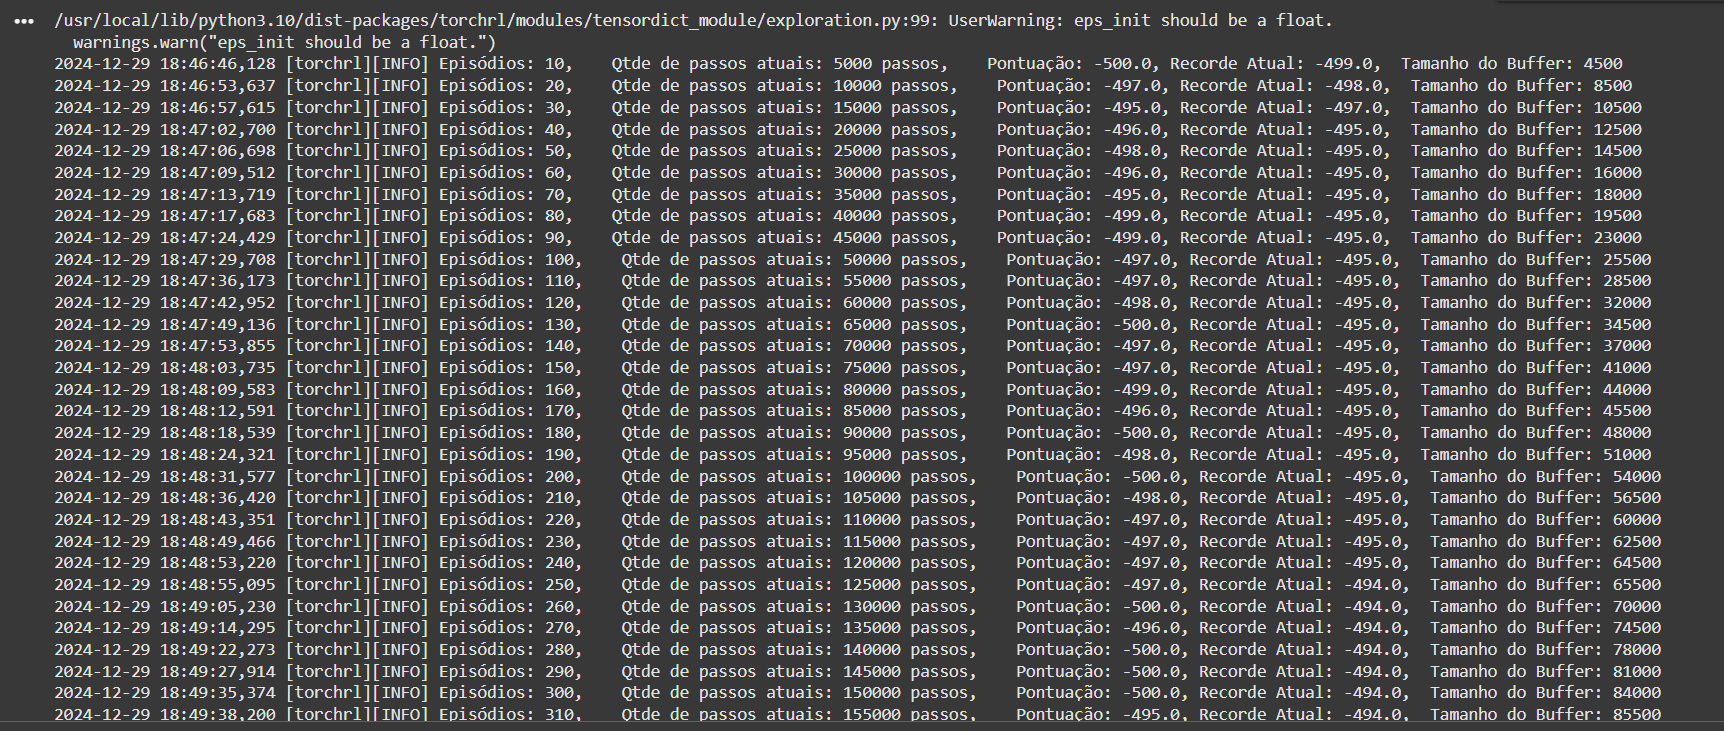

Sobre a figura acima: a quantidade de passos não condiz com a quantidade de experiências armazenadas no RB.

Essa diferença só aumenta, onde no ep 200 tem-se 100 mil passos, porem só 54 mil exp no RB.

*VERIFICAR PQ HÁ ESSA DIFERENÇA*

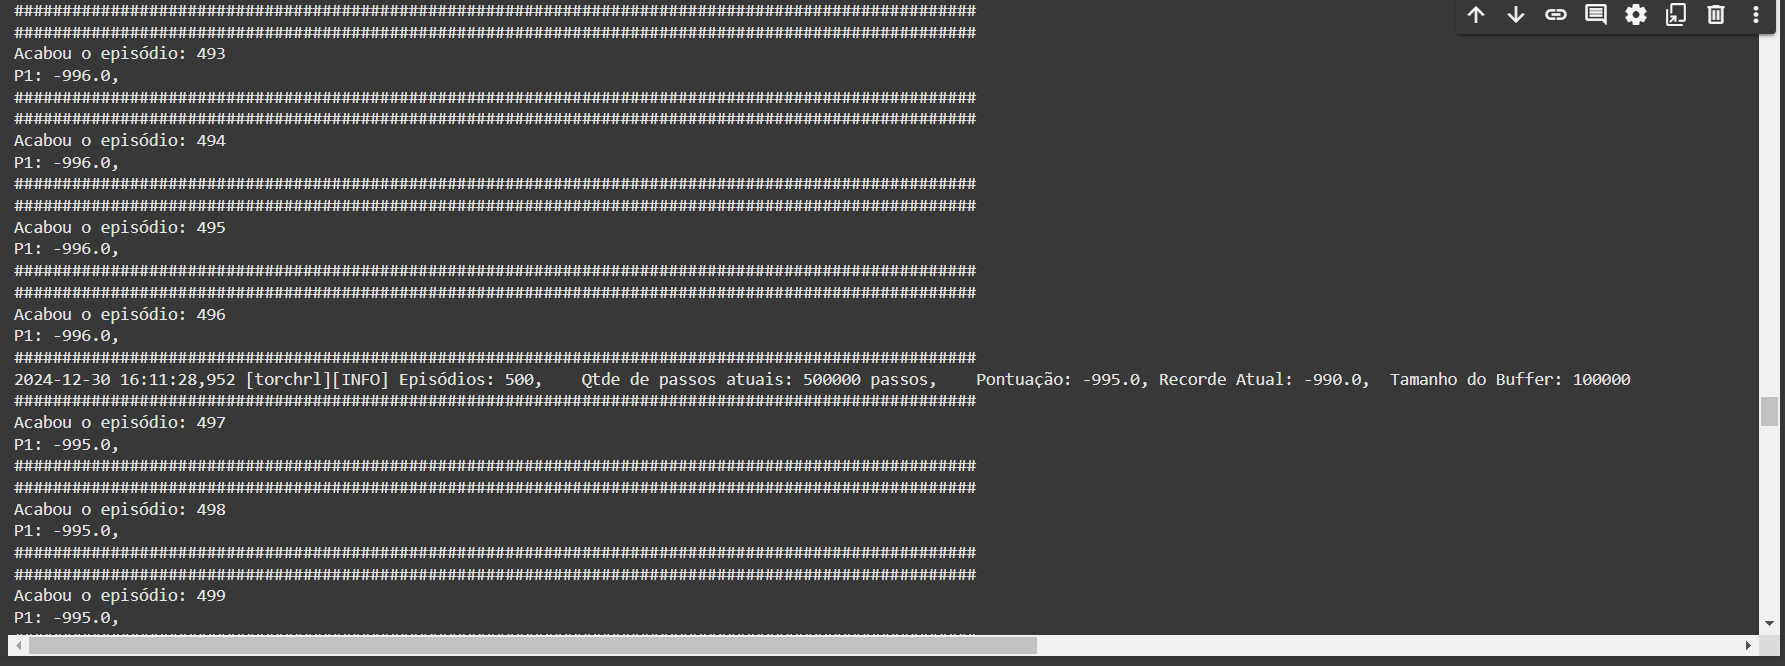

Usei dois prints diferentes( print e torchrl_logger.info) com a mesma variável (self.total_episodios), porem, conforme imagem acima, o torch.info chegou em 500 antes do print que ainda estava em 497.

Na figura acima havia uma discrepância maior que corrigi, mas não resolveu o problema por completo.

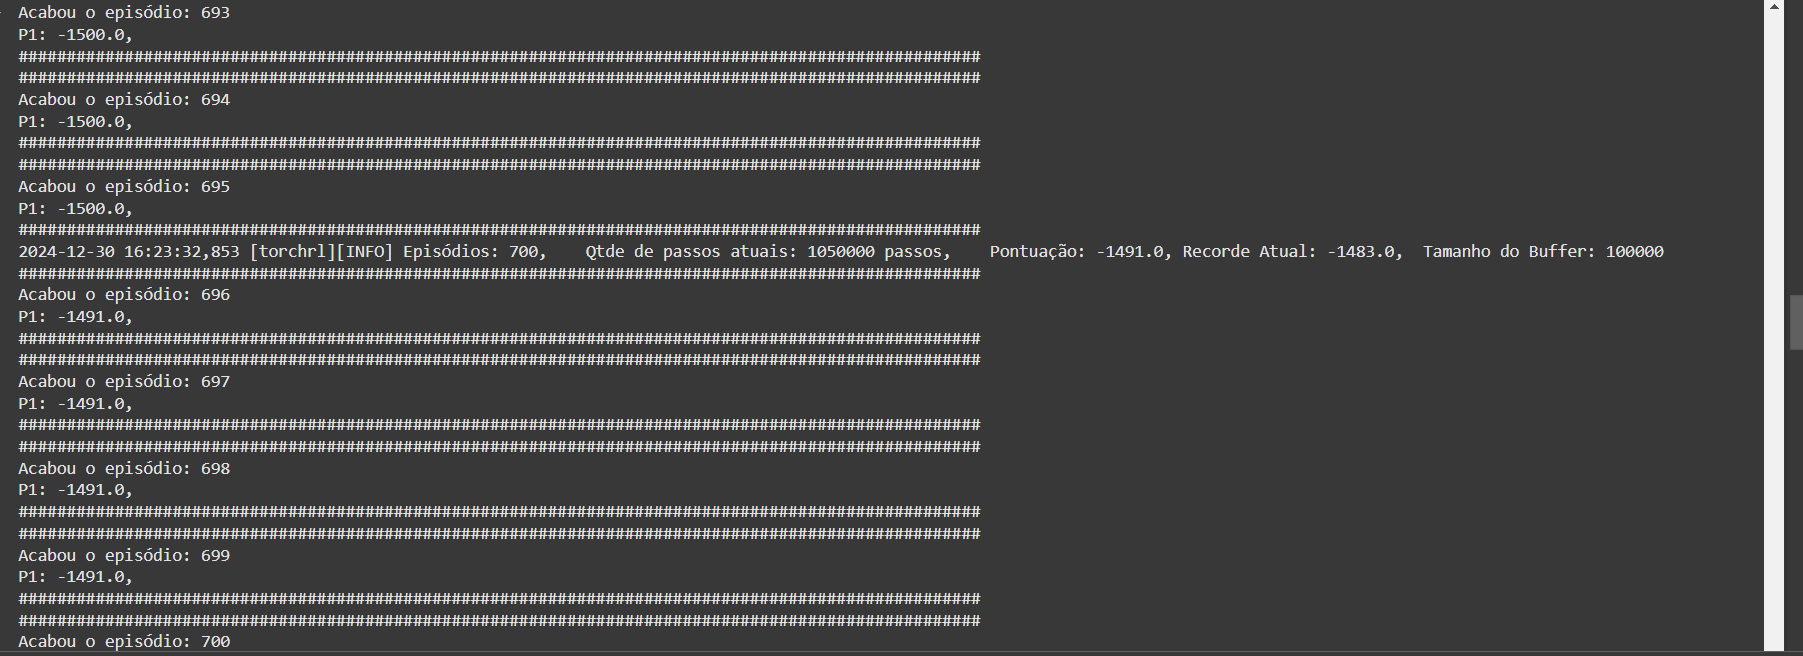

A figura acima foi depois da pequena correção, mas o erro permaneceu

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V1 = carrega_array("C1",
                  "V1",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V1

In [ ]:
resultado_1_V1_git = carrega_array_git("C1",
                  "V1",
                  numero_simulacao = 10,
                  # caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V1_git

In [ ]:
resultado = carrega_varios("C1",
                           "V1",
                           inicio = 1,
                           fim = 2,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado = carrega_varios_git("C1",
                           "V1",
                           inicio = 1,
                           fim = 20,
                          #  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V1 = resultado_medio(resultado)

### Gráficos

In [ ]:
plotar(resultado_medio_V1['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = False,
       xlimit = episodios,
       ylimit = 500,   # verificar
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V1['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = False,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V1['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = False,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V1['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = False,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V1['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

### Estatísticas

In [ ]:
print(f"Resultados médios das {np.shape(resultado_medio_V1)[1]} simulações: ")

media_recompensa_treinamento_V1 = np.mean(resultado_medio_V1['Rewards_ep'])
print(f"A recompensa média do treinamento é: {media_recompensa_treinamento_V1}")

media_recompensa_avaliacao_V1 = np.mean(resultado_medio_V1['Rewards_ep_eval'])
print(f"A recompensa média da avaliação é: {media_recompensa_avaliacao_V1}")

media_taxa_sucesso_V1 = np.mean(resultado_medio_V1['Sucess_Rates'])
print(f"A taxa de sucesso média é: {media_taxa_sucesso_V1}")

**Skewness**: Mede a assimetria da distribuição dos dados. Um valor de skewness positivo indica que a cauda direita da distribuição é mais longa ou mais gorda que a cauda esquerda. Um valor negativo indica o contrário.

**Kurtosis**: Mede a "altitude" da distribuição. Uma distribuição com alta kurtosis terá caudas mais pesadas e picos mais altos, enquanto uma distribuição com baixa kurtosis será mais plana.

In [ ]:
analisarDados(resultado, simu=9, modo='gráfico')

# V2: PER (ReplayBuffer+Amostra Priorizada)

## Descrição

O Prioritized Experience Replay (PER) é uma melhoria do método tradicional de Experience Replay utilizado em algoritmos de Aprendizado por Reforço, como o DQN. O objetivo do PER é aumentar a eficiência do treinamento, dando prioridade às experiências mais importantes durante o aprendizado.

### Componentes principais do PER:

1. **Experience Replay**: Armazena transições (estado, ação, recompensa, próximo estado) em uma memória de replay. Durante o treinamento, amostras aleatórias dessa memória são usadas para atualizar a rede neural.

2. **Prioritização das Experiências**: Em vez de amostrar transições aleatoriamente, o PER atribui uma prioridade a cada transição, baseada na magnitude do seu erro temporal (TD error). Transições com maiores erros são mais prováveis de serem amostradas, pois são consideradas mais informativas para o aprendizado.

3. **Erro Temporal (TD Error)**: O TD error é a diferença entre o valor Q esperado e o valor Q atual. Ele indica o quanto a rede está errando ao estimar o valor da ação em um determinado estado. Transições com maior TD error têm maior prioridade.

### Funcionamento Básico:

1. **Inicialização**: Inicializa-se a memória de replay com uma estrutura que permite armazenar e acessar transições com suas respectivas prioridades.

2. **Atualização da Memória**: Durante a coleta de experiências, cada transição é armazenada na memória com uma prioridade inicial alta para garantir que seja amostrada pelo menos uma vez.

3. **Amostragem Prioritária**: Durante o treinamento, transições são amostradas com uma probabilidade proporcional à sua prioridade. Isso garante que transições mais importantes tenham mais chances de serem selecionadas.

4. **Rebalanceamento**: Para evitar que apenas transições de alta prioridade sejam amostradas, uma técnica de balanceamento é usada para garantir que todas as transições tenham uma chance mínima de serem selecionadas, promovendo uma exploração mais ampla do espaço de estados.

5. **Atualização das Prioridades**: Após cada atualização da rede, o TD error das transições amostradas é recalculado e suas prioridades na memória de replay são ajustadas de acordo.

### Vantagens:

- **Eficiência do Aprendizado**: Ao focar em transições mais informativas, o PER acelera o processo de aprendizado e melhora a performance do agente.
- **Exploração e Exploração Balanceadas**: A técnica de rebalanceamento garante que o agente não negligencie completamente transições menos importantes, mantendo um bom equilíbrio entre exploração e exploração.

### Aplicações:

- **Jogos de Vídeo**: O PER pode ser aplicado em algoritmos como o DQN para melhorar a performance em ambientes de alta dimensionalidade, como jogos.
- **Robótica e Automação**: Pode ser usado para otimizar o aprendizado de robôs em tarefas complexas.
- **Problemas de Decisão e Controle**: Em áreas como finanças, saúde e logística, onde o aprendizado eficiente é crucial.

O PER representa uma abordagem mais sofisticada para o gerenciamento de experiências em algoritmos de Aprendizado por Reforço, aumentando a eficiência do treinamento e permitindo que o agente aprenda políticas eficazes mais rapidamente.

## Parâmetros da Versão

In [ ]:
reducao = "none"                # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V2_rb"  # Define o nome da experiência.
etiqueta = "video_V2_rb"        # Uma tag para identificar os vídeos nos logs.

## Classe Agente V2

In [ ]:
class Mod_Agente_V2_RB:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.alfa = alfa
        self.beta = beta
        self.rb = criar_Buffer_Replay_Amostra_PER(self.tamanho_buffer,  self.alfa, self.beta)
        self.funcao_perda = funcao_perda
        self.reducao = reducao             # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

    def treinar_agente(self, episodios, tamanho_amostra):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        # self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recorde_atual = 0                            # Inicializa uma variável para armazenar o comprimento máximo dos episódios.

        ### Otimização Ajustada
        # Variáveis para armazenar os parâmetros da rede em diferentes instantes
        self.parametros_rede_inicial = None
        self.parametros_rede_apos_atualizacao_1 = None
        # self.parametros_rede_apos_atualizacao_2 = None
        self.media_recompensas_ultimos_100_inicial = 0            # None
        self.media_recompensas_ultimos_100_atualizacao_1 = 0      # None
        # self.media_recompensas_ultimos_100_atualizacao_2 = None

        ### Variáveis Auxiliares
        self.dizimo = 0.1*self.episodios

        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):

            # for passo_atual in dado["next","step_count"]:
            # Itera sobre os passos no dado atual
            for passo_atual, terminou in zip(dado["next", "step_count"], dado["next", "done"]):     # Contador de passos e verificador de done
                if terminou:                                                                        # Verifica se o episódio foi concluído

                    ### Monitoramento e Registro do Número de Episódios
                    self.total_episodios += 1  # Atualiza o contador total de episódios completados
                    # Obtém a soma das recompensas do episódio
                    pontuacao_episodio = dado["next", "reward"].sum().item()

                    if (self.total_episodios % self.dizimo) == 0 and self.total_episodios != 0:
                        torchrl_logger.info(
                                            f"Episódios: {self.total_episodios}, Pontuação: {pontuacao_episodio}, "
                                            f"Recorde Atual: {self.recorde_atual}, Tamanho do Buffer: {len(self.rb)}"
                                            )

                    self.recompensas_treinamento.append(dado["next", "reward"].sum().item())
                    self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))

            indices = self.rb.extend(dado)                                                  # Grava dados no buffer de repetição
            # Pegar o máx da lista de recom treina --- Comprimento máx. dos episódios armazenados no buffer de replay, acessando o campo "step_count".
            self.recorde_atual = max(self.recompensas_treinamento)

            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:             # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.
                ### Loop de Otimização
                  for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                      if self.tamanho_amostra>len(self.rb):pass
                      amostra, info = self.rb.sample(self.tamanho_amostra, return_info=True)            # Amostra 200 transições do buffer de replay.
                      valores_erro = self.perda(amostra)                                                # Calcula os valores de perda usando a amostra
                      self.rb.update_priority(index = info['index'], priority = valores_erro["loss"])
                      valores_erro["loss"] = valores_erro["loss"].mean()
                      valores_erro["loss"].backward()                                                   # Calcula os gradientes da perda.
                      self.otimizador.step()                                                            # Atualiza os parâmetros da rede usando o otimizador.
                      self.otimizador.zero_grad()                                                       # Zera os gradientes acumulados para a próxima iteração.

                      ### Atualização do Fator de Exploração
                      self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                      ### Atualização dos Parâmetros da Rede-alvo
                      self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.

            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            self.total_passos += dado.numel()                              # Atualiza o contador total de passos coletados.
            # self.total_episodios += dado["next", "done"].sum()             # Atualiza o contador total de episódios completados.

            # ### Monitoramento e Registro
            # if (self.total_episodios % 100)==0:
            #     torchrl_logger.info(f"Episódios: {self.total_episodios}, Recorde Atual: {recorde_atual}, Tamanho do Buffer {len(self.rb)}")

            ### Condição de Parada
            if self.total_episodios >= self.episodios:
                break

        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s/{tempo_treinamento/60}m/{tempo_treinamento/3600}h.")


        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000 ):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

## Treinamento

In [ ]:
simulacao_inicial = 1
simulacao_final = 2
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V2_RB = Mod_Agente_V2_RB(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                                    tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V2_RB.treinar_agente(episodios, tamanho_amostra)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} s / {tempo_treinamento/60} m / {tempo_treinamento/3600} h")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V2_RB.ambiente, agente_V2_RB.politica_deterministica,
                                                                                                                    max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} s / {tempo_avaliacao/60} m / {tempo_avaliacao/3600} h")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} s / {tempo_simulacao/60} m / {tempo_simulacao/3600} h")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V2_rb",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

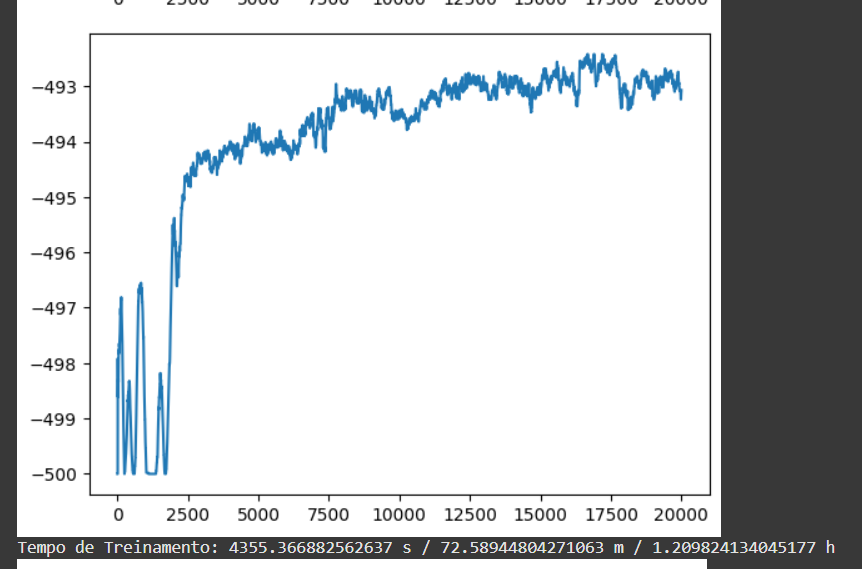

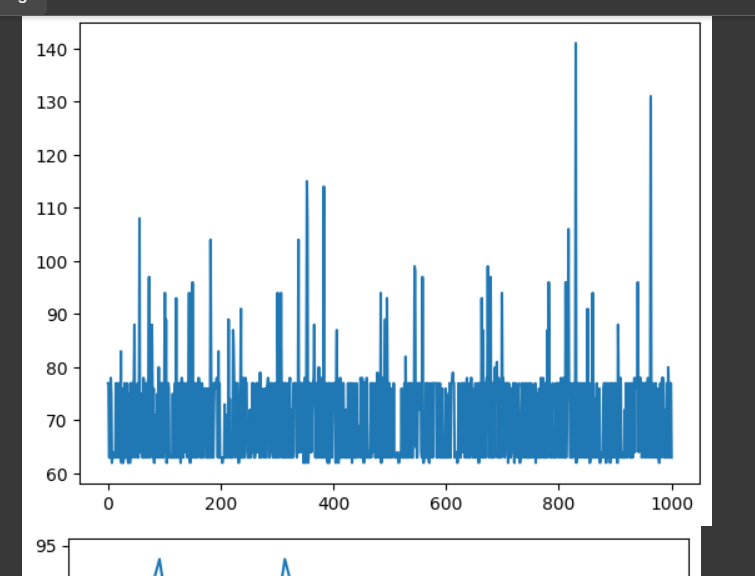

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V2_rb = carrega_array("C1",
                  "V2_rb",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V2_rb.head()

In [ ]:
resultado = carrega_varios("C1",
                           "V2_rb",
                           inicio = 1,
                           fim = 20,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V2_rb = resultado_medio(resultado)

In [ ]:
plotar(resultado_medio_V2_rb['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V2_rb['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V2_rb['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V2_rb['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V2_rb['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

### Estatísticas

In [ ]:
media_recompensa_treinamento_V2_rb = np.mean(resultado_medio_V2_rb['Rewards_ep'])
print(f"A recompensa média do treinamento é: {media_recompensa_treinamento_V2_rb}")

media_recompensa_avaliacao_V2_rb = np.mean(resultado_medio_V2_rb['Rewards_ep_eval'])
print(f"A recompensa média da avaliação é: {media_recompensa_avaliacao_V2_rb}")

media_taxa_sucesso_V2_rb = np.mean(resultado_medio_V2_rb['Sucess_Rates'])
print(f"A taxa de sucesso média é: {media_taxa_sucesso_V2_rb}")

# V2.1: PER Priorização Média

##Descrição

A PER média amostral é similar à PER tradicional, porém, em vez de priorizar cada amostra individualmente, as amostras são agrupadas em conjuntos. A priorização de cada conjunto é determinada pela média das prioridades individuais das experiências que o compõem.

## Parâmetros da Versão

In [ ]:
reducao = "mean"                # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V2.1"   # Define o nome da experiência.
etiqueta = "video_V2.1"         # Uma tag para identificar os vídeos nos logs.

## Classe Agente V2.1

In [ ]:
class Mod_Agente_V2_1:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.alfa = alfa
        self.beta = beta
        self.rb = criar_Buffer_Replay_PER(self.tamanho_buffer,  self.alfa, self.beta)
        self.funcao_perda = funcao_perda
        self.reducao = reducao            # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

    def treinar_agente(self, episodios, tamanho_amostra):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        # self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recorde_atual = 0                            # Inicializa uma variável para armazenar o comprimento máximo dos episódios.

        ### Variáveis Auxiliares
        self.dizimo = 0.1*self.episodios

        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):

            # Itera sobre os passos no dado atual
            for passo_atual, terminou in zip(dado["next", "step_count"], dado["next", "done"]):     # Contador de passos e verificador de done
                if terminou:                                                                        # Verifica se o episódio foi concluído

                    ### Monitoramento e Registro do Número de Episódios
                    self.total_episodios += 1                                                       # Atualiza o contador total de episódios completados
                    # Obtém a soma das recompensas do episódio
                    pontuacao_episodio = dado["next", "reward"].sum().item()

                    if (self.total_episodios % self.dizimo) == 0 and self.total_episodios != 0:
                        torchrl_logger.info(
                                            f"Episódios: {self.total_episodios}, Pontuação: {pontuacao_episodio}, "
                                            f"Recorde Atual: {self.recorde_atual}, Tamanho do Buffer: {len(self.rb)}"
                                            )

                    self.recompensas_treinamento.append(dado["next", "reward"].sum().item())
                    self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))

            indices = self.rb.extend(dado)                                                  # Grava dados no buffer de repetição
            # Pegar o máx da lista de recom treina --- Comprimento máx. dos episódios armazenados no buffer de replay, acessando o campo "step_count".
            self.recorde_atual = max(self.recompensas_treinamento)


            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:             # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.
                ### Loop de Otimização
                  for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                      if self.tamanho_amostra>len(self.rb):pass
                      amostra, info = self.rb.sample(self.tamanho_amostra, return_info=True)            # Amostra 200 transições do buffer de replay.
                      valores_erro = self.perda(amostra)                                                # Calcula os valores de perda usando a amostra
                      self.rb.update_priority(index = info['index'], priority = valores_erro["loss"])
                      valores_erro["loss"].backward()                                                   # Calcula os gradientes da perda.
                      self.otimizador.step()                                                            # Atualiza os parâmetros da rede usando o otimizador.
                      self.otimizador.zero_grad()                                                       # Zera os gradientes acumulados para a próxima iteração.

                      ### Atualização do Fator de Exploração
                      self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                      ### Atualização dos Parâmetros da Rede-alvo
                      self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.


            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            self.total_passos += dado.numel()                              # Atualiza o contador total de passos coletados.
            # self.total_episodios += dado["next", "done"].sum()             # Atualiza o contador total de episódios completados.

            # ### Monitoramento e Registro
            # if (self.total_episodios % 100)==0:
            #     torchrl_logger.info(f"Episódios: {self.total_episodios}, Recorde Atual: {recorde_atual}, Tamanho do Buffer {len(self.rb)}")

            ### Condição de Parada
            if self.total_episodios >= self.episodios:
                break

        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s/{tempo_treinamento/60}m/{tempo_treinamento/3600}h.")

        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000 ):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

## Treinamento

In [ ]:
simulacao_inicial = 49
simulacao_final = 50
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V2_1 = Mod_Agente_V2_1(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                                  tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V2_1.treinar_agente(episodios, tamanho_amostra)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} s / {tempo_treinamento/60} m / {tempo_treinamento/3600} h")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V2_1.ambiente, agente_V2_1.politica_deterministica,
                                                                                                                    max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} s / {tempo_avaliacao/60} m / {tempo_avaliacao/3600} h")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} s / {tempo_simulacao/60} m / {tempo_simulacao/3600} h")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V2.1",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V2_1 = carrega_array("C1",
                  "V2.1",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V2_1.head()

In [ ]:
resultado = carrega_varios("C1",
                           "V2.1",
                           inicio = 1,
                           fim = 20,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V2_1 = resultado_medio(resultado)

In [ ]:
plotar(resultado_medio_V2_1['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V2_1['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V2_1['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V2_1['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V2_1['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

### Estatísticas

In [ ]:
media_recompensa_treinamento_V2_1 = np.mean(resultado_medio_V2_1['Rewards_ep'])
print(f"A recompensa média do treinamento é: {media_recompensa_treinamento_V2_1}")

media_recompensa_avaliacao_V2_1 = np.mean(resultado_medio_V2_1['Rewards_ep_eval'])
print(f"A recompensa média da avaliação é: {media_recompensa_avaliacao_V2_1}")

media_taxa_sucesso_V2_1 = np.mean(resultado_medio_V2_1['Sucess_Rates'])
print(f"A taxa de sucesso média é: {media_taxa_sucesso_V2_1}")

# V2.2: PER Priorização Somada

## Descrição

A PER soma amostral é semelhante à PER média amostral, com a diferença de que, em vez de calcular a média das prioridades das experiências que compõem o conjunto, realiza-se a soma das prioridades individuais. O valor resultante é então aplicado a todo o conjunto.

## Parâmetros da Versão

In [ ]:
reducao = "sum"                   # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V2.2"     # Define o nome da experiência.
etiqueta = "video_V2.2"           # Uma tag para identificar os vídeos nos logs.

## Classe Agente V2.2

In [ ]:
class Mod_Agente_V2_2:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.alfa = alfa
        self.beta = beta
        self.rb = criar_Buffer_Replay_Amostra_PER(self.tamanho_buffer,  self.alfa, self.beta)
        self.funcao_perda = funcao_perda
        self.reducao = reducao            # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

    def treinar_agente(self, episodios, tamanho_amostra):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        # self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recorde_atual = 0                            # Inicializa uma variável para armazenar o comprimento máximo dos episódios.

        ### Variáveis Auxiliares
        self.dizimo = 0.1*self.episodios

        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):

            # Itera sobre os passos no dado atual
            for passo_atual, terminou in zip(dado["next", "step_count"], dado["next", "done"]):     # Contador de passos e verificador de done
                if terminou:                                                                        # Verifica se o episódio foi concluído

                    ### Monitoramento e Registro do Número de Episódios
                    self.total_episodios += 1                                                       # Atualiza o contador total de episódios completados
                    # Obtém a soma das recompensas do episódio
                    pontuacao_episodio = dado["next", "reward"].sum().item()

                    if (self.total_episodios % self.dizimo) == 0 and self.total_episodios != 0:
                        torchrl_logger.info(
                                            f"Episódios: {self.total_episodios}, Pontuação: {pontuacao_episodio}, "
                                            f"Recorde Atual: {self.recorde_atual}, Tamanho do Buffer: {len(self.rb)}"
                                            )

                    self.recompensas_treinamento.append(dado["next", "reward"].sum().item())
                    self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))

            indices = self.rb.extend(dado)                                                  # Grava dados no buffer de repetição
            # Pegar o máx da lista de recom treina --- Comprimento máx. dos episódios armazenados no buffer de replay, acessando o campo "step_count".
            self.recorde_atual = max(self.recompensas_treinamento)


            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:             # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.
                ### Loop de Otimização
                  for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                      if self.tamanho_amostra>len(self.rb):pass
                      amostra, info = self.rb.sample(self.tamanho_amostra, return_info=True)   # Amostra 200 transições do buffer de replay.
                      valores_erro = self.perda(amostra)               # Calcula os valores de perda usando a amostra
                      self.rb.update_priority(index = info['index'], priority = valores_erro["loss"])
                      valores_erro["loss"].backward()                  # Calcula os gradientes da perda.
                      self.otimizador.step()                           # Atualiza os parâmetros da rede usando o otimizador.
                      self.otimizador.zero_grad()                      # Zera os gradientes acumulados para a próxima iteração.

                      ### Atualização do Fator de Exploração
                      self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                      ### Atualização dos Parâmetros da Rede-alvo
                      self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.

            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            self.total_passos += dado.numel()                              # Atualiza o contador total de passos coletados.
            # self.total_episodios += dado["next", "done"].sum()             # Atualiza o contador total de episódios completados.

            # ### Monitoramento e Registro
            # if (self.total_episodios % 100)==0:
            #     torchrl_logger.info(f"Episódios: {self.total_episodios}, Recorde Atual: {recorde_atual}, Tamanho do Buffer {len(self.rb)}")

            ### Condição de Parada
            if self.total_episodios >= self.episodios:
                break

        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s/{tempo_treinamento/60}m/{tempo_treinamento/3600}h.")

        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000 ):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

## Treinamento

In [ ]:
simulacao_inicial = 49
simulacao_final = 50
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V2_2 = Mod_Agente_V2_2(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                                  tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V2_2.treinar_agente(episodios, tamanho_amostra)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} s / {tempo_treinamento/60} m / {tempo_treinamento/3600} h")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V2_2.ambiente, agente_V2_2.politica_deterministica,
                                                                                                                    max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} s / {tempo_avaliacao/60} m / {tempo_avaliacao/3600} h")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} s / {tempo_simulacao/60} m / {tempo_simulacao/3600} h")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V2.2",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V2_2 = carrega_array("C1",
                  "V2.2",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V2_2.head()

In [ ]:
resultado = carrega_varios("C1",
                           "V2.2",
                           inicio = 1,
                           fim = 20,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V2_2 = resultado_medio(resultado)

In [ ]:
plotar(resultado_medio_V2_2['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V2_2['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V2_2['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V2_2['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V2_2['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

### Estatísticas

In [ ]:
media_recompensa_treinamento_V2_2 = np.mean(resultado_medio_V2_2['Rewards_ep'])
print(f"A recompensa média do treinamento é: {media_recompensa_treinamento_V2_2}")

media_recompensa_avaliacao_V2_2 = np.mean(resultado_medio_V2_2['Rewards_ep_eval'])
print(f"A recompensa média da avaliação é: {media_recompensa_avaliacao_V2_2}")

media_taxa_sucesso_V2_2 = np.mean(resultado_medio_V2_2['Sucess_Rates'])
print(f"A taxa de sucesso média é: {media_taxa_sucesso_V2_2}")

## Renderização

Por fim, executamos o ambiente em tantas etapas quanto possível e salvamos o vídeo localmente (observe que não estamos explorando).

In [ ]:
# Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
record_env.rollout(max_steps=1000, policy=policy)

# Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
video_recorder.dump()

In [ ]:
# logger # CSVLogger(exp_name=dqn, experiment=CSVExperiment(log_dir=./training_loop/dqn))

# V3: PER Últimos Índices (Priorização 1ª Vez)

## Descrição

Semelhante ao PER tradicional, porém as amostras recebem um incremento a mais no seus últimos índices.

## Parâmetros da Versão

In [ ]:
reducao = "none"                  # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V3_1v"    # Define o nome da experiência.
etiqueta = "video_V3_1v"          # Uma tag para identificar os vídeos nos logs.

## Classe Agente V3

In [ ]:
class Mod_Agente_V3_1v:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.alfa = alfa
        self.beta = beta
        self.rb = criar_Buffer_Replay_Amostra_PER(self.tamanho_buffer,  self.alfa, self.beta)
        self.funcao_perda = funcao_perda
        self.reducao = reducao            # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

    def treinar_agente(self, episodios, tamanho_amostra, recompensa_maxima):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        # self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recorde_atual = 0                            # Inicializa uma variável para armazenar o comprimento máximo dos episódios.
        self.recompensa_maxima = recompensa_maxima        # Especifica a recompensa máxima que o agente pode atingir.

        ### CONTROLE DO TREINAMENTO ###
        Num_do_Teste               = 9
        Quantidade_de_Treinamentos = 2
        Criterio_de_Parada         = 5
        Parada                     = False
        Avaliacao_no_Treinamento   = False
        Log_Estatico_dos_Result    = True

        ### VARIÁVEIS UTILIZADAS ###
        parada_500                = 0
        indice_final              = 0
        mean_recomp_ep            = []
        # indices_incrementar     = []
        parar                     = False
        Valor_Anterior            = None
        indices_incrementar       = deque(maxlen = 10_000)
        incremento_prioridade     = torch.full((len(indices_incrementar),), 10)

        ### Variáveis Auxiliares
        self.dizimo = 0.1*self.episodios

        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):
            indices = self.rb.extend(dado)                                                          # Grava dados no buffer de repetição

            # Itera sobre os passos no dado atual
            # for l, passo_atual, terminou in zip(enumerate(dado["next", "step_count"]), dado["next", "done"]):     # Contador de passos e verificador de done
            for l, passo_atual in enumerate(dado["next", "step_count"]):
              for terminou in dado["next", "done"]:
                if terminou:                                                                        # Verifica se o episódio foi concluído

                    ### Monitoramento e Registro do Número de Episódios
                    self.total_episodios += 1                                                       # Atualiza o contador total de episódios completados
                    # Obtém a soma das recompensas do episódio
                    pontuacao_episodio = dado["next", "reward"].sum().item()

                    if (self.total_episodios % self.dizimo) == 0 and self.total_episodios != 0:
                        torchrl_logger.info(
                                            f"Episódios: {self.total_episodios}, Pontuação: {pontuacao_episodio}, "
                                            f"Recorde Atual: {self.recorde_atual}, Tamanho do Buffer: {len(self.rb)}"
                                            )

                    self.recompensas_treinamento.append(dado["next", "reward"].sum().item())
                    self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))

                    # ########################## MUDANÇA IMPLEMENTADA ########################
                    indices_incrementar.append(indices[l-1].item())
                    incremento_prioridade = torch.full((len(indices_incrementar),), 100)
                    self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)            # 1ª VEZ
                    # ########################################################################

                            # if passo_atual == self.recompensa_maxima:
                # ############## CONDIÇÕES DE PARADA ################
                #     parada_500 += 1
                #     if Parada:
                #         if parada_500 >= Criterio_de_Parada: stop = not stop
                # if Avaliacao_no_Treinamento:
                #     recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao = avaliar(self.ambiente,
                #                                                                                                 self.politica_deterministica,
                #                                                                                                 max_steps = passos_maximo)
                #     if media_recompensas_avaliacao >= (self.recompensa_maxima * 0.99): parar = not parar
                ###################################################

            ### Condição de Parada
            if ((self.total_episodios >= self.episodios) and (Parada == False)): break
            elif parar: break

            # Pegar o máx da lista de recom treina --- Comprimento máx. dos episódios armazenados no buffer de replay, acessando o campo "step_count".
            self.recorde_atual = max(self.recompensas_treinamento)


            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:             # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.
                ### Loop de Otimização
                  for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                      if self.tamanho_amostra>len(self.rb):pass
                      amostra, info = self.rb.sample(self.tamanho_amostra, return_info = True)   # Amostra 200 transições do buffer de replay.
                      valores_erro = self.perda(amostra)               # Calcula os valores de perda usando a amostra
                      self.rb.update_priority(index = info['index'], priority = valores_erro["loss"])
                      valores_erro["loss"] = valores_erro["loss"].mean()      # Usar PER Normal pois reduction = "None"
                      valores_erro["loss"].backward()                  # Calcula os gradientes da perda.
                      self.otimizador.step()                           # Atualiza os parâmetros da rede usando o otimizador.
                      self.otimizador.zero_grad()                      # Zera os gradientes acumulados para a próxima iteração.

                      ### Atualização do Fator de Exploração
                      self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                      ### Atualização dos Parâmetros da Rede-alvo
                      self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.

            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            self.total_passos += dado.numel()                          # Atualiza o contador total de passos coletados.

            # ### Monitoramento e Registro
            # if (self.total_episodios % 100)==0:
            #     torchrl_logger.info(f"Episódios: {self.total_episodios}, Recorde Atual: {recorde_atual}, Tamanho do Buffer {len(self.rb)}")
            # if (Log_Estatico_dos_Result): clear_output(wait=True)
            # Num_Treinamentos += 1
            # Num_do_Teste += 1

        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s/{tempo_treinamento/60}m/{tempo_treinamento/3600}h.")

        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000 ):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

## Treinamento

In [ ]:
simulacao_inicial = 49
simulacao_final = 50
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V3_1v = Mod_Agente_V3_1v(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                                    tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V3_1v.treinar_agente(episodios, tamanho_amostra, recompensa_maxima)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} s / {tempo_treinamento/60} m / {tempo_treinamento/3600} h")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V3_1v.ambiente, agente_V3_1v.politica_deterministica,
                                                                                                                    max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} s / {tempo_avaliacao/60} m / {tempo_avaliacao/3600} h")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} s / {tempo_simulacao/60} m / {tempo_simulacao/3600} h")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V3_1v",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V3_1v = carrega_array("C1",
                  "V3_1v",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V3_1v.head()

In [ ]:
resultado = carrega_varios("C1",
                           "V3_1v",
                           inicio = 1,
                           fim = 20,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V3_1v = resultado_medio(resultado)

In [ ]:
plotar(resultado_medio_V3_1v['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V3_1v['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V3_1v['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V3_1v['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V3_1v['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

### Estatísticas

In [ ]:
media_recompensa_treinamento_V3_1v = np.mean(resultado_medio_V3_1v['Rewards_ep'])
print(f"A recompensa média do treinamento é: {media_recompensa_treinamento_V3_1v}")

media_recompensa_avaliacao_V3_1v = np.mean(resultado_medio_V3_1v['Rewards_ep_eval'])
print(f"A recompensa média da avaliação é: {media_recompensa_avaliacao_V3_1v}")

media_taxa_sucesso_V3_1v = np.mean(resultado_medio_V3_1v['Sucess_Rates'])
print(f"A taxa de sucesso média é: {media_taxa_sucesso_V3_1v}")

# V3.1: PER Melhores Índices (Max)

## Descrição

Semelhante ao PER útimos índices, porém os últimos índices só são priorizados quando a pontuação máxima é atingida, o que leva ao nome de melhores índices.

## Parâmetros da Versão

In [ ]:
reducao = "none"          # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V3.1"            # Define o nome da experiência.
etiqueta = "video_V3.1"               # Uma tag para identificar os vídeos nos logs.

## Classe V3.1

In [ ]:
class Mod_Agente_V3_1:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.alfa = alfa
        self.beta = beta
        self.rb = criar_Buffer_Replay_Amostra_PER(self.tamanho_buffer,  self.alfa, self.beta)
        self.funcao_perda = funcao_perda
        self.reducao = reducao            # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

    def treinar_agente(self, episodios, tamanho_amostra, recompensa_maxima):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recompensa_maxima = recompensa_maxima        # Especifica a recompensa máxima que o agente pode atingir.

        ### CONTROLE DO TREINAMENTO ###
        Num_do_Teste               = 9
        Quantidade_de_Treinamentos = 2
        Criterio_de_Parada         = 5
        Parada                     = False
        Avaliacao_no_Treinamento   = False
        Log_Estatico_dos_Result    = True

        ### VARIÁVEIS UTILIZADAS ###
        parada_500                = 0
        indice_final            = 0
        mean_recomp_ep          = []
        # indices_incrementar     = []
        parar                    = False
        Valor_Anterior          = None
        indices_incrementar     = deque(maxlen = 10_000)
        incremento_prioridade   = torch.full((len(indices_incrementar),), 10)

        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):
            indices = self.rb.extend(dado)      # Grava dados no buffer de repetição

            for l, passo_atual in enumerate(dado["next","step_count"]):
                if self.passo_anterior is not None:
                    if passo_atual < self.passo_anterior:
                        self.total_episodios += 1         # Atualiza o contador total de episódios completados.
                        self.recompensas_treinamento.append(self.passo_anterior.item())
                        self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))
                self.passo_anterior = passo_atual

                if passo_atual == self.recompensa_maxima:
                # ############## CONDIÇÕES DE PARADA ################
                #     parada_500 += 1
                #     if Parada:
                #         if parada_500 >= Criterio_de_Parada: stop = not stop
                # if Avaliacao_no_Treinamento:
                #     recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao = avaliar(self.ambiente,
                #                                                                                                 self.politica_deterministica,
                #                                                                                                 max_steps = passos_maximo)
                #     if media_recompensas_avaliacao >= (self.recompensa_maxima * 0.99): parar = not parar
                ###################################################
                # ########################## MUDANÇA IMPLEMENTADA ########################
                    indices_incrementar.append(max(dado["next","step_count"]).item())
                    incremento_prioridade = torch.full((len(indices_incrementar),), 100)
                    self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)
                # ########################################################################

            ### Condição de Parada
            if ((self.total_episodios >= self.episodios) and (Parada == False)): break
            elif parar: break

            recorde_atual = self.rb[:]["next", "step_count"].max()   # Calcula o comprimento máx. dos episódios armazenados no buffer de replay.

            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:             # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.
                ### Loop de Otimização
                  for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                      if self.tamanho_amostra>len(self.rb):pass
                      amostra, info = self.rb.sample(self.tamanho_amostra, return_info = True)   # Amostra 200 transições do buffer de replay.
                      valores_erro = self.perda(amostra)               # Calcula os valores de perda usando a amostra
                      self.rb.update_priority(index = info['index'], priority = valores_erro["loss"])
                      # self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)                  # 2ª VEZ
                      valores_erro["loss"] = valores_erro["loss"].mean()      # Usar PER Normal pois reduction = "None"
                      valores_erro["loss"].backward()                  # Calcula os gradientes da perda.
                      self.otimizador.step()                           # Atualiza os parâmetros da rede usando o otimizador.
                      self.otimizador.zero_grad()                      # Zera os gradientes acumulados para a próxima iteração.

                      ### Atualização do Fator de Exploração
                      self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                      ### Atualização dos Parâmetros da Rede-alvo
                      self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.

            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            self.total_passos += dado.numel()                          # Atualiza o contador total de passos coletados.

            ### Monitoramento e Registro
            if (self.total_episodios % 100)==0:
                torchrl_logger.info(f"Episódios: {self.total_episodios}, Recorde Atual: {recorde_atual}, Tamanho do Buffer {len(self.rb)}")
            # if (Log_Estatico_dos_Result): clear_output(wait=True)
            # Num_Treinamentos += 1
            # Num_do_Teste += 1
        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s.")

        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000 ):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

## Treinamento

In [ ]:
simulacao_inicial = 11
simulacao_final = 11
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V3_1 = Mod_Agente_V3_1(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini,
                                  passos_otimizacao, tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau,
                                  caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V3_1.treinar_agente(episodios, tamanho_amostra, recompensa_maxima)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} segundos")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V3_1.ambiente, agente_V3_1.politica_deterministica, max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} segundos")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} segundos")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V3_1",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V3_1 = carrega_array("C1",
                  "V3_1",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V3_1.head()

In [ ]:
resultado = carrega_varios("C1",
                           "V3_1",
                           inicio = 1,
                           fim = 10,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V3_1 = resultado_medio(resultado)

In [ ]:
plotar(resultado_medio_V3_1['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V3_1['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V3_1['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V3_1['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V3_1['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

# V3.2: PER Melhores Índices (Semi-Trajetória 1)

## Descrição

Semelhante ao PER melhores índices, porém  não são salvos apenas os últimos índices, são salvos um conjunto de índices (semi-trajetória). Quando a pontuação máxima é atingida, a semi-trajetória será formada pelos índices que atingiram um percentual maior que a base definida em relação a pontuação máxima.

## Parâmetros da Versão

In [ ]:
reducao = "none"          # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V3.2_sm1"            # Define o nome da experiência.
etiqueta = "video_V3.2_sm1"               # Uma tag para identificar os vídeos nos logs.

## Classe Agente V3.2

In [ ]:
class Mod_Agente_V3_2_sm1:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.alfa = alfa
        self.beta = beta
        self.rb = criar_Buffer_Replay_Amostra_PER(self.tamanho_buffer,  self.alfa, self.beta)
        self.funcao_perda = funcao_perda
        self.reducao = reducao            # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

    def treinar_agente(self, episodios, tamanho_amostra, recompensa_maxima):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recompensa_maxima = recompensa_maxima        # Especifica a recompensa máxima que o agente pode atingir.

        ### CONTROLE DO TREINAMENTO ###
        Num_do_Teste               = 9
        Quantidade_de_Treinamentos = 2
        Criterio_de_Parada         = 5
        Parada                     = False
        Avaliacao_no_Treinamento   = False
        Log_Estatico_dos_Result    = True

        ### VARIÁVEIS UTILIZADAS ###
        parada_500                = 0
        indice_final            = 0
        mean_recomp_ep          = []
        # indices_incrementar     = []
        parar                    = False
        Valor_Anterior          = None
        indices_incrementar     = deque(maxlen = 10_000)
        incremento_prioridade   = torch.full((len(indices_incrementar),), 10)

        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):
            indices = self.rb.extend(dado)      # Grava dados no buffer de repetição

            for l, passo_atual in enumerate(dado["next","step_count"]):
                if self.passo_anterior is not None:
                    if passo_atual < self.passo_anterior:
                        self.total_episodios += 1         # Atualiza o contador total de episódios completados.
                        self.recompensas_treinamento.append(self.passo_anterior.item())
                        self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))
                self.passo_anterior = passo_atual

                if passo_atual == self.recompensa_maxima:
                # ############## CONDIÇÕES DE PARADA ################
                #     parada_500 += 1
                #     if Parada:
                #         if parada_500 >= Criterio_de_Parada: stop = not stop
                # if Avaliacao_no_Treinamento:
                #     recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao = avaliar(self.ambiente,
                #                                                                                                 self.politica_deterministica,
                #                                                                                                 max_steps = passos_maximo)
                #     if media_recompensas_avaliacao >= (recompensa_maxima * 0.99): parar = not parar
                ###################################################
                # ########################## MUDANÇA IMPLEMENTADA ############################
                    melhores_indicies = torch.nonzero(dado["next","step_count"] > (self.recompensa_maxima * 0.6), as_tuple = True)[0]
                    for i in melhores_indicies.tolist():
                        indices_incrementar.append(indices[i].item())
                    incremento_prioridade = torch.full((len(indices_incrementar),), 10)
                    self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)
                # ############################################################################

            ### Condição de Parada
            if ((self.total_episodios >= self.episodios) and (Parada == False)): break
            elif parar: break

            recorde_atual = self.rb[:]["next", "step_count"].max()   # Calcula o comprimento máx. dos episódios armazenados no buffer de replay.

            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:             # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.
                ### Loop de Otimização
                  for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                      if self.tamanho_amostra>len(self.rb):pass
                      amostra, info = self.rb.sample(self.tamanho_amostra, return_info = True)   # Amostra 200 transições do buffer de replay.
                      valores_erro = self.perda(amostra)               # Calcula os valores de perda usando a amostra
                      self.rb.update_priority(index = info['index'], priority = valores_erro["loss"])
                      # self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)                  # 2ª VEZ
                      valores_erro["loss"] = valores_erro["loss"].mean()      # Usar PER Normal pois reduction = "None"
                      valores_erro["loss"].backward()                  # Calcula os gradientes da perda.
                      self.otimizador.step()                           # Atualiza os parâmetros da rede usando o otimizador.
                      self.otimizador.zero_grad()                      # Zera os gradientes acumulados para a próxima iteração.

                      ### Atualização do Fator de Exploração
                      self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                      ### Atualização dos Parâmetros da Rede-alvo
                      self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.

            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            self.total_passos += dado.numel()                          # Atualiza o contador total de passos coletados.

            ### Monitoramento e Registro
            if (self.total_episodios % 100)==0:
                torchrl_logger.info(f"Episódios: {self.total_episodios}, Recorde Atual: {recorde_atual}, Tamanho do Buffer {len(self.rb)}")
            # if (Log_Estatico_dos_Result): clear_output(wait=True)
            # Num_Treinamentos += 1
            # Num_do_Teste += 1
        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s.")

        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000 ):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

## Treinamento

In [ ]:
simulacao_inicial = 11
simulacao_final = 11
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V3_2_sm1 = Mod_Agente_V3_2_sm1(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini,
                                  passos_otimizacao, tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau,
                                  caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V3_2_sm1.treinar_agente(episodios, tamanho_amostra, recompensa_maxima)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} segundos")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V3_2_sm1.ambiente, agente_V3_2_sm1.politica_deterministica, max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} segundos")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} segundos")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V3.2_sm1",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V3_2_sm1 = carrega_array("C1",
                  "V3.2_sm1",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V3_2_sm1.head()

In [ ]:
resultado = carrega_varios("C1",
                           "V3.2_sm1",
                           inicio = 1,
                           fim = 10,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V3_2_sm1 = resultado_medio(resultado)

In [ ]:
plotar(resultado_medio_V3_2_sm1['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V3_2_sm1['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V3_2_sm1['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V3_2_sm1['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V3_2_sm1['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

# V3.3: PER Piores Índices (Max)

## Parâmetros da Versão

In [ ]:
reducao = "none"          # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V3.3"             # Define o nome da experiência.
etiqueta = "video_V3.3"             # Uma tag para identificar os vídeos nos logs.

## Classe V3.3

In [ ]:
class Mod_Agente_V3_3:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.alfa = alfa
        self.beta = beta
        self.rb = criar_Buffer_Replay_Amostra_PER(self.tamanho_buffer,  self.alfa, self.beta)
        self.funcao_perda = funcao_perda
        self.reducao = reducao            # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

    def treinar_agente(self, episodios, tamanho_amostra, recompensa_maxima):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recompensa_maxima = recompensa_maxima        # Especifica a recompensa máxima que o agente pode atingir.

        ### CONTROLE DO TREINAMENTO ###
        Num_do_Teste               = 9
        Quantidade_de_Treinamentos = 2
        Criterio_de_Parada         = 5
        Parada                     = False
        Avaliacao_no_Treinamento   = False
        Log_Estatico_dos_Result    = True

        ### VARIÁVEIS UTILIZADAS ###
        parada_500                = 0
        indice_final            = 0
        mean_recomp_ep          = []
        # indices_incrementar     = []
        parar                    = False
        Valor_Anterior          = None
        indices_incrementar     = deque(maxlen = 10_000)
        incremento_prioridade   = torch.full((len(indices_incrementar),), 10)

        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):
            indices = self.rb.extend(dado)      # Grava dados no buffer de repetição

            for l, passo_atual in enumerate(dado["next","step_count"]):
                if self.passo_anterior is not None:
                    if passo_atual < self.passo_anterior:
                        self.total_episodios += 1         # Atualiza o contador total de episódios completados.
                        self.recompensas_treinamento.append(self.passo_anterior.item())
                        self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))
                self.passo_anterior = passo_atual

                if passo_atual < (self.recompensa_maxima * 0.1):
                # ########################## MUDANÇA IMPLEMENTADA ########################
                    indices_incrementar.append(max(dado["next","step_count"]).item())
                    incremento_prioridade = torch.full((len(indices_incrementar),), 100)
                    self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)
                # ########################################################################

                # if passo_atual == self.recompensa_maxima:
                # ############## CONDIÇÕES DE PARADA ################
                #     parada_500 += 1
                #     if Parada:
                #         if parada_500 >= Criterio_de_Parada: stop = not stop
                # if Avaliacao_no_Treinamento:
                #     recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao = avaliar(self.ambiente,
                #                                                                                                 self.politica_deterministica,
                #                                                                                                 max_steps = passos_maximo)
                #     if media_recompensas_avaliacao >= (self.recompensa_maxima * 0.99): parar = not parar
                ###################################################

            ### Condição de Parada
            if ((self.total_episodios >= self.episodios) and (Parada == False)): break
            elif parar: break

            recorde_atual = self.rb[:]["next", "step_count"].max()   # Calcula o comprimento máx. dos episódios armazenados no buffer de replay.

            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:             # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.
                ### Loop de Otimização
                  for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                      if self.tamanho_amostra>len(self.rb):pass
                      amostra, info = self.rb.sample(self.tamanho_amostra, return_info = True)   # Amostra 200 transições do buffer de replay.
                      valores_erro = self.perda(amostra)               # Calcula os valores de perda usando a amostra
                      self.rb.update_priority(index = info['index'], priority = valores_erro["loss"])
                      # self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)                  # 2ª VEZ
                      valores_erro["loss"] = valores_erro["loss"].mean()      # Usar PER Normal pois reduction = "None"
                      valores_erro["loss"].backward()                  # Calcula os gradientes da perda.
                      self.otimizador.step()                           # Atualiza os parâmetros da rede usando o otimizador.
                      self.otimizador.zero_grad()                      # Zera os gradientes acumulados para a próxima iteração.

                      ### Atualização do Fator de Exploração
                      self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                      ### Atualização dos Parâmetros da Rede-alvo
                      self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.

            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            self.total_passos += dado.numel()                          # Atualiza o contador total de passos coletados.

            ### Monitoramento e Registro
            if (self.total_episodios % 100)==0:
                torchrl_logger.info(f"Episódios: {self.total_episodios}, Recorde Atual: {recorde_atual}, Tamanho do Buffer {len(self.rb)}")
            # if (Log_Estatico_dos_Result): clear_output(wait=True)
            # Num_Treinamentos += 1
            # Num_do_Teste += 1
        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s.")

        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000 ):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

## Treinamento

In [ ]:
simulacao_inicial = 11
simulacao_final = 11
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V3_3 = Mod_Agente_V3_3(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini,
                                  passos_otimizacao, tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau,
                                  caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V3_3.treinar_agente(episodios, tamanho_amostra, recompensa_maxima)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} segundos")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V3_3.ambiente, agente_V3_3.politica_deterministica, max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} segundos")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} segundos")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V3_3",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V3_3 = carrega_array("C1",
                  "V3_3",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V3_3.head()

In [ ]:
resultado = carrega_varios("C1",
                           "V3_3",
                           inicio = 1,
                           fim = 10,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V3_3 = resultado_medio(resultado)

In [ ]:
plotar(resultado_medio_V3_3['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V3_3['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V3_3['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V3_3['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V3_3['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

# V3.4: PER Piores Índices (Semi-Trajetória 2)

## Descrição

Semelhante ao PER melhores índices (semi-trajetória), porém trabalha-se com um percentual baixo afim de pegar os piores índices. Essa abordagem visa trabalhar na base do desafio, fazendo com que o agente aprenda bastante os primeiros passos e daí desenvolva o resto do desafio.

## Parâmetros da Versão

In [ ]:
reducao = "none"          # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V3.4_sm2"            # Define o nome da experiência.
etiqueta = "video_V3.4_sm2"               # Uma tag para identificar os vídeos nos logs.

## Classe Agente V3.4

In [ ]:
class Mod_Agente_V3_4_sm2:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, funcao_perda, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.alfa = alfa
        self.beta = beta
        self.rb = criar_Buffer_Replay_Amostra_PER(self.tamanho_buffer,  self.alfa, self.beta)
        self.funcao_perda = funcao_perda
        self.reducao = reducao            # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

    def treinar_agente(self, episodios, tamanho_amostra, recompensa_maxima):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recompensa_maxima = recompensa_maxima        # Especifica a recompensa máxima que o agente pode atingir.

        ### CONTROLE DO TREINAMENTO ###
        Num_do_Teste               = 9
        Quantidade_de_Treinamentos = 2
        Criterio_de_Parada         = 5
        Parada                     = False
        Avaliacao_no_Treinamento   = False
        Log_Estatico_dos_Result    = True

        ### VARIÁVEIS UTILIZADAS ###
        parada_500                = 0
        indice_final            = 0
        mean_recomp_ep          = []
        # indices_incrementar     = []
        parar                    = False
        Valor_Anterior          = None
        indices_incrementar     = deque(maxlen = 10_000)
        incremento_prioridade   = torch.full((len(indices_incrementar),), 10)

        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):
            indices = self.rb.extend(dado)      # Grava dados no buffer de repetição

            for l, passo_atual in enumerate(dado["next","step_count"]):
                if self.passo_anterior is not None:
                    if passo_atual < self.passo_anterior:
                        self.total_episodios += 1         # Atualiza o contador total de episódios completados.
                        self.recompensas_treinamento.append(self.passo_anterior.item())
                        self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))
                # ########################## MUDANÇA IMPLEMENTADA ############################
                if passo_atual < (self.recompensa_maxima * 0.1):
                    indices_incrementar.append(indices[l].item())
                    incremento_prioridade = torch.full((len(indices_incrementar),), 10)
                    self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)
                # ############################################################################
                self.passo_anterior = passo_atual

                # if passo_atual == self.recompensa_maxima:
                # ############## CONDIÇÕES DE PARADA ################
                #     parada_500 += 1
                #     if Parada:
                #         if parada_500 >= Criterio_de_Parada: stop = not stop
                # if Avaliacao_no_Treinamento:
                #     recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao = avaliar(self.ambiente,
                #                                                                                                 self.politica_deterministica,
                #                                                                                                 max_steps = passos_maximo)
                #     if media_recompensas_avaliacao >= (recompensa_maxima * 0.99): parar = not parar
                ###################################################

            ### Condição de Parada
            if ((self.total_episodios >= self.episodios) and (Parada == False)): break
            elif parar: break

            recorde_atual = self.rb[:]["next", "step_count"].max()   # Calcula o comprimento máx. dos episódios armazenados no buffer de replay.

            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:             # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.
                ### Loop de Otimização
                  for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                      if self.tamanho_amostra>len(self.rb):pass
                      amostra, info = self.rb.sample(self.tamanho_amostra, return_info = True)   # Amostra 200 transições do buffer de replay.
                      valores_erro = self.perda(amostra)               # Calcula os valores de perda usando a amostra
                      self.rb.update_priority(index = info['index'], priority = valores_erro["loss"])
                      # self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)                  # 2ª VEZ
                      valores_erro["loss"] = valores_erro["loss"].mean()      # Usar PER Normal pois reduction = "None"
                      valores_erro["loss"].backward()                  # Calcula os gradientes da perda.
                      self.otimizador.step()                           # Atualiza os parâmetros da rede usando o otimizador.
                      self.otimizador.zero_grad()                      # Zera os gradientes acumulados para a próxima iteração.

                      ### Atualização do Fator de Exploração
                      self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                      ### Atualização dos Parâmetros da Rede-alvo
                      self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.

            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            self.total_passos += dado.numel()                          # Atualiza o contador total de passos coletados.

            ### Monitoramento e Registro
            if (self.total_episodios % 100)==0:
                torchrl_logger.info(f"Episódios: {self.total_episodios}, Recorde Atual: {recorde_atual}, Tamanho do Buffer {len(self.rb)}")
            # if (Log_Estatico_dos_Result): clear_output(wait=True)
            # Num_Treinamentos += 1
            # Num_do_Teste += 1
        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s.")

        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000 ):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

## Treinamento

In [ ]:
simulacao_inicial = 11
simulacao_final = 11
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V3_4_sm2 = Mod_Agente_V3_4_sm2(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini,
                                  passos_otimizacao, tamanho_buffer, alfa, beta, funcao_perda, taxa_aprendizado, tau,
                                  caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V3_4_sm2.treinar_agente(episodios, tamanho_amostra, recompensa_maxima)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} segundos")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V3_4_sm2.ambiente, agente_V3_4_sm2.politica_deterministica, max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} segundos")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} segundos")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V3.4_sm2",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V3_4_sm2 = carrega_array("C1",
                  "V3.4_sm2",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V3_4_sm2.head()

In [ ]:
resultado = carrega_varios("C1",
                           "V3.4_sm2",
                           inicio = 1,
                           fim = 10,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V3_4_sm2 = resultado_medio(resultado)

In [ ]:
plotar(resultado_medio_V3_4_sm2['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V3_4_sm2['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V3_4_sm2['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V3_4_sm2['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V3_4_sm2['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

# V4: PER Última Trajetória

## Descrição

Semelhante as versões de PER índices, porém não são salvos apenas uma quantidade índices, mas todos os índices do episódio (trajetória), quando a pontuação máxima é atingida.

## Parâmetros da Versão

In [ ]:
reducao = "none"          # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V4"            # Define o nome da experiência.
etiqueta = "video_V4"               # Uma tag para identificar os vídeos nos logs.

## Classe Agente V4

In [ ]:
class Mod_Agente_V4:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.alfa = alfa
        self.beta = beta
        self.rb = criar_Buffer_Replay_Amostra_PER(self.tamanho_buffer,  self.alfa, self.beta)
        self.funcao_perda = funcao_perda
        self.reducao = reducao            # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

    def treinar_agente(self, episodios, tamanho_amostra, recompensa_maxima):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        # self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recorde_atual = 0                            # Inicializa uma variável para armazenar o comprimento máximo dos episódios.
        self.recompensa_maxima = recompensa_maxima        # Especifica a recompensa máxima que o agente pode atingir.

        ### CONTROLE DO TREINAMENTO ###
        Num_do_Teste               = 9
        Quantidade_de_Treinamentos = 2
        Criterio_de_Parada         = 5
        Parada                     = False
        Avaliacao_no_Treinamento   = False
        Log_Estatico_dos_Result    = True

        ### VARIÁVEIS UTILIZADAS ###
        parada_500                = 0
        indice_final              = 0
        mean_recomp_ep            = []
        # indices_incrementar     = []
        parar                     = False
        Valor_Anterior            = None
        indices_incrementar       = deque(maxlen = 10_000)
        # incremento_prioridade     = torch.full((len(indices_incrementar),), 10)
        incremento_prioridade     = torch.full((500,), 10)

        ### Variáveis Auxiliares
        self.dizimo = 0.1*self.episodios

        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):
            indices = self.rb.extend(dado)                                                          # Grava dados no buffer de repetição

            # Itera sobre os passos no dado atual
            # for l, passo_atual, terminou in zip(enumerate(dado["next", "step_count"]), dado["next", "done"]):     # Contador de passos e verificador de done
            for l, passo_atual in enumerate(dado["next", "step_count"]):
              for terminou in dado["next", "done"]:
                if terminou:                                                                        # Verifica se o episódio foi concluído

                    ### Monitoramento e Registro do Número de Episódios
                    self.total_episodios += 1                                                       # Atualiza o contador total de episódios completados
                    # Obtém a soma das recompensas do episódio
                    pontuacao_episodio = dado["next", "reward"].sum().item()

                    if (self.total_episodios % self.dizimo) == 0 and self.total_episodios != 0:
                        torchrl_logger.info(
                                            f"Episódios: {self.total_episodios}, Pontuação: {pontuacao_episodio}, "
                                            f"Recorde Atual: {self.recorde_atual}, Tamanho do Buffer: {len(self.rb)}"
                                            )

                    self.recompensas_treinamento.append(dado["next", "reward"].sum().item())
                    self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))

                if passo_atual == self.recompensa_maxima:
                # ############## CONDIÇÕES DE PARADA ################
                #     parada_500 += 1
                #     if Parada:
                #         if parada_500 >= Criterio_de_Parada: stop = not stop
                # if Avaliacao_no_Treinamento:
                #     recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao = avaliar(self.ambiente,
                #                                                                                                 self.politica_deterministica,
                #                                                                                                 max_steps = passos_maximo)
                #     if media_recompensas_avaliacao >= (recompensa_maxima * 0.99): parar = not parar
                ###################################################

                ############################ MUDANÇA IMPLEMENTADA ########################################
                    indice_final = indices[-1]
                    indice_500 = torch.nonzero(dado["next","step_count"] == 499, as_tuple=True)
                    if len(indice_500[0]) > 0: # Check if indice_500 is not empty
                        indices_incrementar = torch.arange(indice_final.item()+1 - 499 + indice_500[0].item()-499,
                                                  indice_final.item()+1 - 499 + indice_500[0].item()+1)
                    self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)
                ##########################################################################################


            ### Condição de Parada
            if ((self.total_episodios >= self.episodios) and (Parada == False)): break
            elif parar: break

            # Pegar o máx da lista de recom treina --- Comprimento máx. dos episódios armazenados no buffer de replay, acessando o campo "step_count".
            self.recorde_atual = max(self.recompensas_treinamento)


            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:             # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.
                ### Loop de Otimização
                  for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                      if self.tamanho_amostra>len(self.rb):pass
                      amostra, info = self.rb.sample(self.tamanho_amostra, return_info = True)   # Amostra 200 transições do buffer de replay.
                      valores_erro = self.perda(amostra)               # Calcula os valores de perda usando a amostra
                      self.rb.update_priority(index = info['index'], priority = valores_erro["loss"])
                      # self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)                  # 2ª VEZ
                      valores_erro["loss"] = valores_erro["loss"].mean()      # Usar PER Normal pois reduction = "None"
                      valores_erro["loss"].backward()                  # Calcula os gradientes da perda.
                      self.otimizador.step()                           # Atualiza os parâmetros da rede usando o otimizador.
                      self.otimizador.zero_grad()                      # Zera os gradientes acumulados para a próxima iteração.

                      ### Atualização do Fator de Exploração
                      self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                      ### Atualização dos Parâmetros da Rede-alvo
                      self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.

            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            self.total_passos += dado.numel()                          # Atualiza o contador total de passos coletados.

            # ### Monitoramento e Registro
            # if (self.total_episodios % 100)==0:
            #     torchrl_logger.info(f"Episódios: {self.total_episodios}, Recorde Atual: {recorde_atual}, Tamanho do Buffer {len(self.rb)}")
            # if (Log_Estatico_dos_Result): clear_output(wait=True)
            # Num_Treinamentos += 1
            # Num_do_Teste += 1

        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s/{tempo_treinamento/60}m/{tempo_treinamento/3600}h.")

        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000 ):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

## Treinamento

In [ ]:
simulacao_inicial = 49
simulacao_final = 50
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V4 = Mod_Agente_V4(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                              tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V4.treinar_agente(episodios, tamanho_amostra, recompensa_maxima)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} s / {tempo_treinamento/60} m / {tempo_treinamento/3600} h")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V4.ambiente, agente_V4.politica_deterministica,
                                                                                                                    max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} s / {tempo_avaliacao/60} m / {tempo_avaliacao/3600} h")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} s / {tempo_simulacao/60} m / {tempo_simulacao/3600} h")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V4",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

RuntimeError                              Traceback (most recent call last)
<ipython-input-53-abb59bbc630a> in <cell line: 3>()
      8
      9     # Treina o agente
---> 10     recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V4.treinar_agente(episodios, tamanho_amostra, recompensa_maxima)
     11
     12     # Plota os resultado do Treinamento

<ipython-input-52-dd1e507e5107> in treinar_agente(self, episodios, tamanho_amostra, recompensa_maxima)
     91                     indice_final = indices[-1]
     92                     indice_500 = torch.nonzero(dado["next","step_count"] == 499, as_tuple=True)
---> 93                     indices_incrementar = torch.arange(indice_final.item()+1 - 499 + indice_500[0].item()-499,
     94                                                   indice_final.item()+1 - 499 + indice_500[0].item()+1)
     95                     self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)

RuntimeError: a Tensor with 0 elements cannot be converted to Scalar

O erro "RuntimeError: a Tensor with 0 elements cannot be converted to Scalar" indica que você está tentando extrair um único valor (um escalar) de um tensor que está vazio. Isso está acontecendo na linha:

In [ ]:
# indices_incrementar = torch.arange(indice_final.item()+1 - 499 + indice_500[0].item()-499,
#                                      indice_final.item()+1 - 499 + indice_500[0].item()+1)

Especificamente, o problema surge de indice_500[0].item(). Este código assume que indice_500 tem pelo menos um elemento. No entanto, indice_500 é derivado de:

In [ ]:
# indice_500 = torch.nonzero(dado["next","step_count"] == 499, as_tuple=True)

Esta linha usa torch.nonzero para encontrar índices onde "step_count" é igual a 499 dentro do tensor dado["next","step_count"]. Se nenhum passo atingir 499, indice_500 será um tensor vazio e tentar acessar indice_500[0] levará ao erro observado.

Sugestões de Mudanças
Parece que você está tentando identificar e priorizar experiências onde o comprimento do episódio ("step_count") atinge 499. O erro ocorre quando nenhum episódio atinge esse comprimento. Para lidar com isso, você precisa adicionar uma verificação para garantir que indice_500 não esteja vazio antes de prosseguir.

In [ ]:
# if passo_atual == self.recompensa_maxima:
#                 indice_final = indices[-1]
#                 indice_500 = torch.nonzero(dado["next","step_count"] == 499, as_tuple=True)
#                 if len(indice_500[0]) > 0: # Check if indice_500 is not empty
#                     indices_incrementar = torch.arange(indice_final.item()+1 - 499 + indice_500[0].item()-499,
#                                                       indice_final.item()+1 - 499 + indice_500[0].item()+1)
#                     self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)

Essa mudança adiciona uma instrução condicional para executar a lógica de priorização apenas se indice_500 contiver pelo menos um elemento. Isso evita o erro quando nenhum episódio atinge uma contagem de passos de 499.

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V4 = carrega_array("C1",
                  "V4",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V4.head()

In [ ]:
resultado = carrega_varios("C1",
                           "V4",
                           inicio = 6,
                           fim = 10,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V4 = resultado_medio(resultado)

In [ ]:
plotar(resultado_medio_V4['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V4['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V4['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V4['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V4['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

### Estatísticas

In [ ]:
media_recompensa_treinamento_V4 = np.mean(resultado_medio_V4['Rewards_ep'])
print(f"A recompensa média do treinamento é: {media_recompensa_treinamento_V4}")

media_recompensa_avaliacao_V4 = np.mean(resultado_medio_V4['Rewards_ep_eval'])
print(f"A recompensa média da avaliação é: {media_recompensa_avaliacao_V4}")

media_taxa_sucesso_V4 = np.mean(resultado_medio_V4['Sucess_Rates'])
print(f"A taxa de sucesso média é: {media_taxa_sucesso_V4}")

# V4.1: PER Melhores Trajetórias

## Descrição

Semelhante a PER Última Trajetória, mas nessa versão é criada uma lista com várias trajetória que atigiram a pontuação máxima.

## Parâmetros da Versão

In [ ]:
reducao = "none"          # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V4.1"            # Define o nome da experiência.
etiqueta = "video_V4.1"               # Uma tag para identificar os vídeos nos logs.

## Classe Agente V4.1

In [ ]:
class Mod_Agente_V4_1:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.alfa = alfa
        self.beta = beta
        self.rb = criar_Buffer_Replay_Amostra_PER(self.tamanho_buffer,  self.alfa, self.beta)
        self.funcao_perda = funcao_perda
        self.reducao = reducao            # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

    def treinar_agente(self, episodios, tamanho_amostra, recompensa_maxima):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recompensa_maxima = recompensa_maxima        # Especifica a recompensa máxima que o agente pode atingir.

        ### CONTROLE DO TREINAMENTO ###
        Num_do_Teste               = 9
        Quantidade_de_Treinamentos = 2
        Criterio_de_Parada         = 5
        Parada                     = False
        Avaliacao_no_Treinamento   = False
        Log_Estatico_dos_Result    = True

        ### VARIÁVEIS UTILIZADAS ###
        parada_500                = 0
        indice_final              = 0
        mean_recomp_ep            = []
        # indices_incrementar     = []
        parar                    = False
        Valor_Anterior          = None
        indices_incrementar     = deque(maxlen = 10_000)
        incremento_prioridade   = torch.full((500,), 10)

        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):
            indices = self.rb.extend(dado)      # Grava dados no buffer de repetição

            for l, passo_atual in enumerate(dado["next","step_count"]):
                if self.passo_anterior is not None:
                    if passo_atual < self.passo_anterior:
                        self.total_episodios += 1         # Atualiza o contador total de episódios completados.
                        self.recompensas_treinamento.append(self.passo_anterior.item())
                        self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))
                self.passo_anterior = passo_atual

                if passo_atual == self.recompensa_maxima:
                # ############## CONDIÇÕES DE PARADA ################
                #     parada_500 += 1
                #     if Parada:
                #         if parada_500 >= Criterio_de_Parada: stop = not stop
                # if Avaliacao_no_Treinamento:
                #     recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao = avaliar(self.ambiente,
                #                                                                                                 self.politica_deterministica,
                #                                                                                                 max_steps = passos_maximo)
                #     if media_recompensas_avaliacao >= (recompensa_maxima * 0.99): parar = not parar
                ###################################################
                    ############################ MUDANÇA IMPLEMENTADA #################################
                    indice_final = indices[-1]
                    indice_500   = torch.nonzero(dado["next","step_count"] == 499, as_tuple=True)
                    indices_Incremento = range(indice_final.item()+1 - 499 + indice_500[0].item()-499,
                                         indice_final.item()+1 - 499 + indice_500[0].item()+1)
                    for i in indices_Incremento:
                        indices_incrementar.append(i)
                    incremento_prioridade = torch.full((len(indices_incrementar),), 10)
                    self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)
                ###################################################################################

            ### Condição de Parada
            if ((self.total_episodios >= self.episodios) and (Parada == False)): break
            elif parar: break

            recorde_atual = self.rb[:]["next", "step_count"].max()   # Calcula o comprimento máx. dos episódios armazenados no buffer de replay.

            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:             # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.
                ### Loop de Otimização
                  for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                      if self.tamanho_amostra>len(self.rb):pass
                      amostra, info = self.rb.sample(self.tamanho_amostra, return_info = True)   # Amostra 200 transições do buffer de replay.
                      valores_erro = self.perda(amostra)               # Calcula os valores de perda usando a amostra
                      self.rb.update_priority(index = info['index'], priority = valores_erro["loss"])
                      # self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)                  # 2ª VEZ
                      valores_erro["loss"] = valores_erro["loss"].mean()      # Usar PER Normal pois reduction = "None"
                      valores_erro["loss"].backward()                  # Calcula os gradientes da perda.
                      self.otimizador.step()                           # Atualiza os parâmetros da rede usando o otimizador.
                      self.otimizador.zero_grad()                      # Zera os gradientes acumulados para a próxima iteração.

                      ### Atualização do Fator de Exploração
                      self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                      ### Atualização dos Parâmetros da Rede-alvo
                      self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.

            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            self.total_passos += dado.numel()                          # Atualiza o contador total de passos coletados.

            ### Monitoramento e Registro
            if (self.total_episodios % 100)==0:
                torchrl_logger.info(f"Episódios: {self.total_episodios}, Recorde Atual: {recorde_atual}, Tamanho do Buffer {len(self.rb)}")
            # if (Log_Estatico_dos_Result): clear_output(wait=True)
            # Num_Treinamentos += 1
            # Num_do_Teste += 1
        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s.")

        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000 ):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

## Treinamento

In [ ]:
simulacao_inicial = 11
simulacao_final = 11
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V4_1 = Mod_Agente_V4_1(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini,
                                  passos_otimizacao, tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau,
                                  caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V4_1.treinar_agente(episodios, tamanho_amostra, recompensa_maxima)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} segundos")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V4_1.ambiente, agente_V4_1.politica_deterministica, max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} segundos")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} segundos")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V4.1",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V4_1 = carrega_array("C1",
                  "V4.1",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V4_1.head()

In [ ]:
resultado = carrega_varios("C1",
                           "V4.1",
                           inicio = 1,
                           fim = 10,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V4_1 = resultado_medio(resultado)

In [ ]:
plotar(resultado_medio_V4_1['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V4_1['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V4_1['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V4_1['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V4_1['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

# V4.3: PER Piores Trajetórias

## Parâmetros da Versão

In [ ]:
reducao = "none"          # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
nome_experiencia = "dqn_V4.3"            # Define o nome da experiência.
etiqueta = "video_V4.3"               # Uma tag para identificar os vídeos nos logs.

## Classe Agente V4.3

In [ ]:
class Mod_Agente_V4_3:
    def __init__(self, nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini, passos_otimizacao,
                 tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau, caminho, nome_experiencia, formato_video, etiqueta):
        # Estrutura do Agente
        self.nome_jogo = nome_jogo
        self.semente = semente
        self.ambiente = criar_ambiente(self.nome_jogo, self.semente)
        self.num_celulas = num_celulas
        self.rede_valor = criar_rede_neural(self.ambiente, self.num_celulas)
        self.passos_decaimento = passos_decaimento
        self.epsilon_ini = epsilon_ini
        self.epsilon_fim = epsilon_fim
        self.politica_deterministica, self.modulo_exploracao, self.politica_exploratoria = criar_politica(self.ambiente, self.rede_valor, self.passos_decaimento, self.epsilon_ini, self.epsilon_fim)
        self.exp_coletadas = exp_coletadas
        self.passos_aleatorios_ini = passos_aleatorios_ini
        self.passos_otimizacao = passos_otimizacao
        self.coletor = criar_coletor(self.ambiente, self.politica_exploratoria, self.exp_coletadas, self.passos_aleatorios_ini)
        self.tamanho_buffer = tamanho_buffer
        self.alfa = alfa
        self.beta = beta
        self.rb = criar_Buffer_Replay_Amostra_PER(self.tamanho_buffer,  self.alfa, self.beta)
        self.funcao_perda = funcao_perda
        self.reducao = reducao            # Especifica a redução a ser aplicada à saída: "none"| "mean"| "sum"
        self.perda = criar_perda(self.politica_deterministica, self.ambiente, self.funcao_perda, self.reducao)
        self.taxa_aprendizado = taxa_aprendizado
        self.otimizador = criar_otimizador(self.perda, self.taxa_aprendizado)
        self.tau = tau
        self.atualizador_rede_alvo = criar_atualizador_rede_alvo(self.perda, self.tau)

        # Exibição por Vídeo
        self.caminho = caminho                    # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.
        self.nome_experiencia = nome_experiencia  # Define o nome da experiência.
        self.formato_video = formato_video        # Especifica o formato de vídeo para gravação.
        self.etiqueta = etiqueta                  # Uma tag para identificar os vídeos nos logs.
        self.registrador, self.gravador_video, self.ambiente_gravacao = criar_registrador(self.nome_experiencia, self.caminho, self.formato_video, self.etiqueta, self.nome_jogo)

    def treinar_agente(self, episodios, tamanho_amostra, recompensa_maxima):
        # Váriaveis para o treinamento
        self.total_passos = 0                             # Inicializa um contador para o número total de passos coletados.
        self.total_episodios = 0                          # Inicializa um contador para o número total de episódios completados.
        self.passo_anterior = None                        # Inicializa uma variável para armazenar o último passo coletado.
        self.tempo_ini = time.time()                      # Armazena o tempo de início do treinamento para calcular a duração total no final.
        self.recompensas_treinamento = []                 # Inicializa uma lista para armazenar as recompensas de cada episódio.
        self.recompensas_medias_treinamento = []          # Inicializa uma lista para armazenar as recompensas médias de cada 100 episódios.
        self.episodios = episodios                        # Especifica o número total de episódios a serem treinados.
        self.tamanho_amostra = tamanho_amostra            # Especifica o tamanho da amostra a ser coletada em cada iteração
        self.recompensa_maxima = recompensa_maxima        # Especifica a recompensa máxima que o agente pode atingir.

        ### CONTROLE DO TREINAMENTO ###
        Num_do_Teste               = 9
        Quantidade_de_Treinamentos = 2
        Criterio_de_Parada         = 5
        Parada                     = False
        Avaliacao_no_Treinamento   = False
        Log_Estatico_dos_Result    = True

        ### VARIÁVEIS UTILIZADAS ###
        parada_500                = 0
        indice_final              = 0
        mean_recomp_ep            = []
        # indices_incrementar     = []
        parar                    = False
        Valor_Anterior          = None
        indices_incrementar     = deque(maxlen = 10_000)
        incremento_prioridade   = torch.full((500,), 10)

        ### Loop principal do treinamento.
        for i, dado in enumerate(self.coletor):
            indices = self.rb.extend(dado)      # Grava dados no buffer de repetição

            for l, passo_atual in enumerate(dado["next","step_count"]):
                if self.passo_anterior is not None:
                    if passo_atual < self.passo_anterior:
                        self.total_episodios += 1         # Atualiza o contador total de episódios completados.
                        self.recompensas_treinamento.append(self.passo_anterior.item())
                        self.recompensas_medias_treinamento.append(np.mean(self.recompensas_treinamento[-100:]))
                self.passo_anterior = passo_atual

                if passo_atual == self.recompensa_maxima:
                # ############## CONDIÇÕES DE PARADA ################
                #     parada_500 += 1
                #     if Parada:
                #         if parada_500 >= Criterio_de_Parada: stop = not stop
                # if Avaliacao_no_Treinamento:
                #     recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao = avaliar(self.ambiente,
                #                                                                                                 self.politica_deterministica,
                #                                                                                                 max_steps = passos_maximo)
                #     if media_recompensas_avaliacao >= (recompensa_maxima * 0.99): parar = not parar
                ###################################################
                ########################## MUDANÇA IMPLEMENTADA ############################
                    base = torch.nonzero(dado["next","step_count"] < 100, as_tuple=True)[0]
                    for i in base.tolist():
                        indices_incrementar.append(indices[i].item())
                    incremento_prioridade = torch.full((len(indices_incrementar),), 10)
                    self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)
                 ############################################################################

            ### Condição de Parada
            if ((self.total_episodios >= self.episodios) and (Parada == False)): break
            elif parar: break

            recorde_atual = self.rb[:]["next", "step_count"].max()   # Calcula o comprimento máx. dos episódios armazenados no buffer de replay.

            ### Condição para Iniciar a Otimização
            if len(self.rb) >= self.passos_aleatorios_ini:             # Verifica se o tamanho do buffer de replay é maior que init_rand_steps.
                ### Loop de Otimização
                  for _ in range(self.passos_otimizacao):              # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
                      if self.tamanho_amostra>len(self.rb):pass
                      amostra, info = self.rb.sample(self.tamanho_amostra, return_info = True)   # Amostra 200 transições do buffer de replay.
                      valores_erro = self.perda(amostra)               # Calcula os valores de perda usando a amostra
                      self.rb.update_priority(index = info['index'], priority = valores_erro["loss"])
                      # self.rb.update_priority(index = indices_incrementar, priority = incremento_prioridade)                  # 2ª VEZ
                      valores_erro["loss"] = valores_erro["loss"].mean()      # Usar PER Normal pois reduction = "None"
                      valores_erro["loss"].backward()                  # Calcula os gradientes da perda.
                      self.otimizador.step()                           # Atualiza os parâmetros da rede usando o otimizador.
                      self.otimizador.zero_grad()                      # Zera os gradientes acumulados para a próxima iteração.

                      ### Atualização do Fator de Exploração
                      self.modulo_exploracao.step(dado.numel())        # Atualiza o fator de exploração baseado no número de elementos em data.

                      ### Atualização dos Parâmetros da Rede-alvo
                      self.atualizador_rede_alvo.step()                # Realiza a atualização suave dos parâmetros da rede-alvo.

            ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
            self.total_passos += dado.numel()                          # Atualiza o contador total de passos coletados.

            ### Monitoramento e Registro
            if (self.total_episodios % 100)==0:
                torchrl_logger.info(f"Episódios: {self.total_episodios}, Recorde Atual: {recorde_atual}, Tamanho do Buffer {len(self.rb)}")
            # if (Log_Estatico_dos_Result): clear_output(wait=True)
            # Num_Treinamentos += 1
            # Num_do_Teste += 1
        ### Cálculo e Registro do Tempo Total de Treinamento
        tempo_fim = time.time()                               # Armazena o tempo de término do treinamento.
        tempo_treinamento = tempo_fim - self.tempo_ini        # Calcula o tempo total de treinamento em segundos.
        torchrl_logger.info(f"Resolvido depois de {self.total_passos} passos, {self.total_episodios} episódios em {tempo_treinamento}s.")

        return self.recompensas_treinamento, self.recompensas_medias_treinamento, tempo_treinamento

    def renderizar_video(self, maximo_passos = 1000 ):
        # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
        self.ambiente_gravacao.rollout(max_steps = maximo_passos, policy = self.politica_deterministica)

        # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
        self.gravador_video.dump()

## Treinamento

In [ ]:
simulacao_inicial = 11
simulacao_final = 11
for semente in range(simulacao_inicial, (simulacao_final+1)):
    # Cria o agente
    agente_V4_3 = Mod_Agente_V4_3(nome_jogo, semente, num_celulas, passos_decaimento, epsilon_ini, epsilon_fim, exp_coletadas, passos_aleatorios_ini,
                                  passos_otimizacao, tamanho_buffer, alfa, beta, funcao_perda, reducao, taxa_aprendizado, tau,
                                  caminho, nome_experiencia, formato_video, etiqueta)

    # Treina o agente
    recompensas_treinamento, recompensas_medias_treinamento, tempo_treinamento = agente_V4_3.treinar_agente(episodios, tamanho_amostra, recompensa_maxima)

    # Plota os resultado do Treinamento
    plt.plot(recompensas_treinamento)
    plt.show()
    plt.plot(recompensas_medias_treinamento)
    plt.show()
    print(f"Tempo de Treinamento: {tempo_treinamento} segundos")

    # Avalia o agente
    recompensas_avaliacao, recompensas_medias_avaliacao, media_recompensas_avaliacao, tempo_ini_avaliacao = avaliar(agente_V4_3.ambiente, agente_V4_3.politica_deterministica, max_steps = passos_maximo)

    # Plota os resultados da Avaliação
    plt.plot(recompensas_avaliacao)
    plt.show()
    plt.plot(recompensas_medias_avaliacao)
    plt.show()
    print(f"Média das Recompensas da Avaliação: {media_recompensas_avaliacao}")

    # Calcula a Taxa de Sucesso da Avaliação e Plota o Resultado
    Sucessos, Desempenho_Medio = taxa_sucesso(recompensas_medias_avaliacao)

    # Calcula o Tempo de Avaliação e de Simulação
    tempo_fim_avaliacao = time.time()
    tempo_avaliacao = tempo_fim_avaliacao - tempo_ini_avaliacao
    print(f"Tempo de Avaliação: {tempo_avaliacao} segundos")
    tempo_simulacao = tempo_treinamento + tempo_avaliacao
    print(f"Tempo de Simulação: {tempo_simulacao} segundos")

    # Salva o resultado da simulação
    caminho_destino = salvar_array(
                  recompensas_treinamento,
                  recompensas_medias_treinamento,
                  recompensas_avaliacao,
                  recompensas_medias_avaliacao,
                  media_recompensas_avaliacao,
                  Sucessos,
                  Desempenho_Medio,
                  tempo_treinamento,
                  tempo_avaliacao,
                  tempo_simulacao,
                  cenario = "C1",
                  versao = "V4.3",
                  numero_simulacao = semente,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)

## Carrega e Exibe Resultados

In [ ]:
resultado_1_V4_3 = carrega_array("C1",
                  "V4.3",
                  numero_simulacao = 1,
                  caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                  pasta = nome_pasta)
resultado_1_V4_3.head()

In [ ]:
resultado = carrega_varios("C1",
                           "V4.3",
                           inicio = 1,
                           fim = 10,
                           caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                           pasta = nome_pasta)
resultado[0].head()

In [ ]:
resultado_medio_V4_3 = resultado_medio(resultado)

In [ ]:
plotar(resultado_medio_V4_3['Rewards_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V4_3['Rewards_mean_ep'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = episodios,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar(resultado_medio_V4_3['Rewards_ep_eval'],
       xlabel = 'Episódios',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 1000,
       ylimit = 500,
       title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V4_3['Rewards_mean_ep_eval'],
       xlabel = 'Testes',
       ylabel = 'Recompensa Total',
       limit = True,
       xlimit = 10,
       ylimit = 500,
       title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar(resultado_medio_V4_3['Sucess_Rates'],
       xlabel = 'Testes',
       ylabel = 'Taxa de Sucesso (%)',
       limit = True,
       xlimit = 10,
       ylimit = 100,
       title = 'Média das Taxas de Sucesso  nas Avaliações')

# Comparativo de Resultados

In [ ]:
resultado_medio_V1, resultado_medio_V2_rb, resultado_medio_V2_1, resultado_medio_V2_2, resultado_medio_V3_1v, resultado_medio_V4 = carrega_media_versoes(cenario = "C1",
                          # versao = ["V1", "V2_rb", "V2_prb", "V2.1", "V2.2", "V3_1v", "V3_2v", "V3_1", "V3.2_sm1", "V3.2_sm2", "V3_3", "V3.4_sm1", "V3.4_sm2", "V4", "V4.1", "V4.2", "V4.3" ],
                          # versao = ["V1", "V2_rb", "V2.1", "V2.2", "V3_1v", "V3_1", "V3.2_sm1", "V3_3", "V3.4_sm2", "V4", "V4.1", "V4.3" ],
                          versao = ["V1", "V2_rb", "V2.1", "V2.2", "V3_1v", "V4" ],
                          inicio = 1,
                          fim = 20,
                          caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                          pasta = nome_pasta)

In [ ]:
resultado_medio_V1, resultado_medio_V2_rb, resultado_medio_V2_1, resultado_medio_V2_2, resultado_medio_V3_1v, resultado_medio_V4 = carrega_media_versoes_git(cenario = "C1",
                          # versao = ["V1", "V2_rb", "V2_prb", "V2.1", "V2.2", "V3_1v", "V3_2v", "V3_1", "V3.2_sm1", "V3.2_sm2", "V3_3", "V3.4_sm1", "V3.4_sm2", "V4", "V4.1", "V4.2", "V4.3" ],
                          # versao = ["V1", "V2_rb", "V2.1", "V2.2", "V3_1v", "V3_1", "V3.2_sm1", "V3_3", "V3.4_sm2", "V4", "V4.1", "V4.3" ],
                          versao = ["V1", "V2_rb", "V2.1", "V2.2", "V3_1v", "V4" ],
                          inicio = 1,
                          fim = 20,
                          # caminho = '/content/drive/My Drive/CBA 2024/Resultados/',
                          # caminho = 'https://raw.githubusercontent.com/BrunoFMenezes/AprendizadoPorReforcoProfundo//main/Resultados/',
                          pasta = nome_pasta)

In [ ]:
plan_versoes = [resultado_medio_V1, resultado_medio_V2_rb, resultado_medio_V2_1, resultado_medio_V2_2, resultado_medio_V3_1v, resultado_medio_V4]
tag_versoes = ['V1', 'V2_rb', 'V2.1', 'V2.2', 'V3_1v', 'V4']
checarResultados(plan_versoes, n_ep = episodios)

## Gráficos

In [ ]:
plotar_versoes(    coluna = 'Rewards_ep',
                   xlabel = 'Episódios',
                   ylabel = 'Recompensa Total',
                   tamanho_fig = (12, 8),
                   grade = False,
                   limit = False,
                   xlimit = episodios,
                   ylimit = 500,
                   title = 'Média dos Desempenhos por Episódio nos Treinamentos')

In [ ]:
plotar_versoes(    coluna = 'Rewards_mean_ep',
                   xlabel = 'Episódios',
                   ylabel = 'Recompensa Total',
                   tamanho_fig = (12, 8),
                   grade = False,
                   limit = False,
                   xlimit = episodios,
                   ylimit = 500,
                   title = 'Desempenho Médio por Episódio nos Treinamentos')

In [ ]:
plotar_versoes(    coluna = 'Rewards_ep_eval',
                   xlabel = 'Episódios',
                   ylabel = 'Recompensa Total',
                   tamanho_fig = (12, 8),
                   grade = False,
                   limit = False,
                   xlimit = 1000,
                   ylimit = 500,
                   title = 'Média dos Desempenhos por Episódio nas Avaliações')

In [ ]:
plotar_versoes(    coluna = 'Rewards_mean_ep_eval',
                   xlabel = 'Testes',
                   ylabel = 'Recompensa Total',
                   tamanho_fig = (12, 8),
                   grade = False,
                   limit = False,
                   xlimit = 9,
                   ylimit = 500,
                   title = 'Desempenho Médio por Episódio nas Avaliações')

In [ ]:
plotar_versoes(    coluna = 'Sucess_Rates',
                   xlabel = 'Testes',
                   ylabel = 'Taxa de Sucesso (%)',
                   tamanho_fig = (12, 8),
                   grade = False,
                   limit = False,
                   xlimit = 10,
                   ylimit = 100,
                   title = 'Média das Taxas de Sucesso  nas Avaliações')

## Tabelas

In [ ]:
tabela_recompensa = criar_tabela_recompensa(plan_versoes)
tabela_recompensa

In [ ]:
tabela_tempo_recompensa = criar_tabela(plan_versoes)
tabela_tempo_recompensa

In [ ]:
tabela_ultima = criar_tabela_ultimas_recompensas(plan_versoes)
tabela_ultima

## Estatísticas

**Skewness**: Mede a assimetria da distribuição dos dados. Um valor de skewness positivo indica que a cauda direita da distribuição é mais longa ou mais gorda que a cauda esquerda. Um valor negativo indica o contrário.

**Kurtosis**: Mede a "altitude" da distribuição. Uma distribuição com alta kurtosis terá caudas mais pesadas e picos mais altos, enquanto uma distribuição com baixa kurtosis será mais plana.

In [ ]:
analisarVariosDados(plan_versoes, tag_versoes, simu=9, modo='gráfico')